In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import re

text = "first \nsecond line"

# Using $ to match the end of each line
pattern1 = r"line$"
match1 = re.search(pattern1, text, re.MULTILINE)
print(match1)  # Match

# Using \Z to match the end of the entire string
pattern2 = r"first\Z"
match2 = re.search(pattern2, text)
print(match2)  # No match

# Using \Z to match the end of the entire string
pattern3 = r"line\Z"
match3 = re.search(pattern3, text, re.MULTILINE)
print(match3)  # Match


<re.Match object; span=(14, 18), match='line'>
<re.Match object; span=(14, 18), match='line'>
<re.Match object; span=(14, 18), match='line'>


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DataCoSupplyChainDataset.csv', encoding='latin-1')

In [ ]:
data.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### Data Preprocessing and Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
data.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [ ]:
data.shape

(180519, 53)

In [ ]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [ ]:
columns_to_drop = ['Product Description','Order Zipcode', 'Customer Email', 'Customer Password', 'Product Status']

# df.drop(['Product Description', 'Product Status','Order Item Cardprod Id', 'Order Zipcode',
#          'Customer Email', 'Customer Password', 'Product Image', 'Product Category Id'])

data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
data.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod 

In [ ]:
data['Customer Lname'].fillna('lname', inplace=True)

In [ ]:
data.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod 

In [ ]:
# df['Category Name'].nunique()

In [ ]:
data.shape

(180519, 48)

In [ ]:
count_same_values = (data['Product Card Id'] == data['Order Item Cardprod Id']).sum()
count_same_values

# Since the values are the same, thus we can drop one column.
# Dropping - Order Item Cardprod Id

180519

In [ ]:
count_same_values_category_id = (data['Category Id'] == data['Product Category Id']).sum()
count_same_values_category_id

# Since the values are the same, thus we can drop one column.
# Dropping - Product Category Id

180519

In [ ]:
# keep for further exploration
# count_same_values_order_item_tot = (data['Sales per customer'] == data['Order Item Total']).sum()
# count_same_values_order_item_tot

# # Since the values are the same, thus we can drop one column.
# # Dropping - Product Category Id

In [ ]:
# keep for further exploration
# count_same_values_prod_price = (data['Product Price'] == data['Order Item Product Price']).sum()
# count_same_values_prod_price

# # Since the values are the same, thus we can drop one column.
# # Dropping - Product Category Id

In [ ]:
# # Check for columns with the same values in the entire DataFrame
# same_values_columns = data.columns[data.T.duplicated()]

# print("Columns with all the same values in the entire DataFrame:")
# print(same_values_columns)

In [ ]:
subset_columns = ['Order Item Cardprod Id','Customer Zipcode', 'Product Image', 'Product Category Id']
data.drop(columns=subset_columns, inplace=True)

In [ ]:
data.shape

(180519, 44)

In total we dropped 9 irrelevant columns that were either duplicated or had lesser priority for the analysis.

Column names are as follows:
'Product Description','Order Zipcode', 'Customer Email', 'Customer Password', 'Product Status', 'Order Item Cardprod Id','Customer Zipcode', 'Product Image', 'Product Category Id'

Retaining column like Customer Zipcode which can be further used for further data exploration (eg: APIs to retrive latitude and longitude of Customer Countries using Zipcode)

In [ ]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Name',
       'Product Price', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [ ]:
column_name = 'Order Id'
unique_count = data[column_name].nunique()
print(f"Unique count in '{column_name}': {unique_count}")

Unique count in 'Order Id': 65752


There are total 180519 orders under the same "Order Id" but only 65749 orders are actually unique.

In [ ]:
column_name = 'Order Id'
unique_count = data[column_name].unique()
len(unique_count)

65752

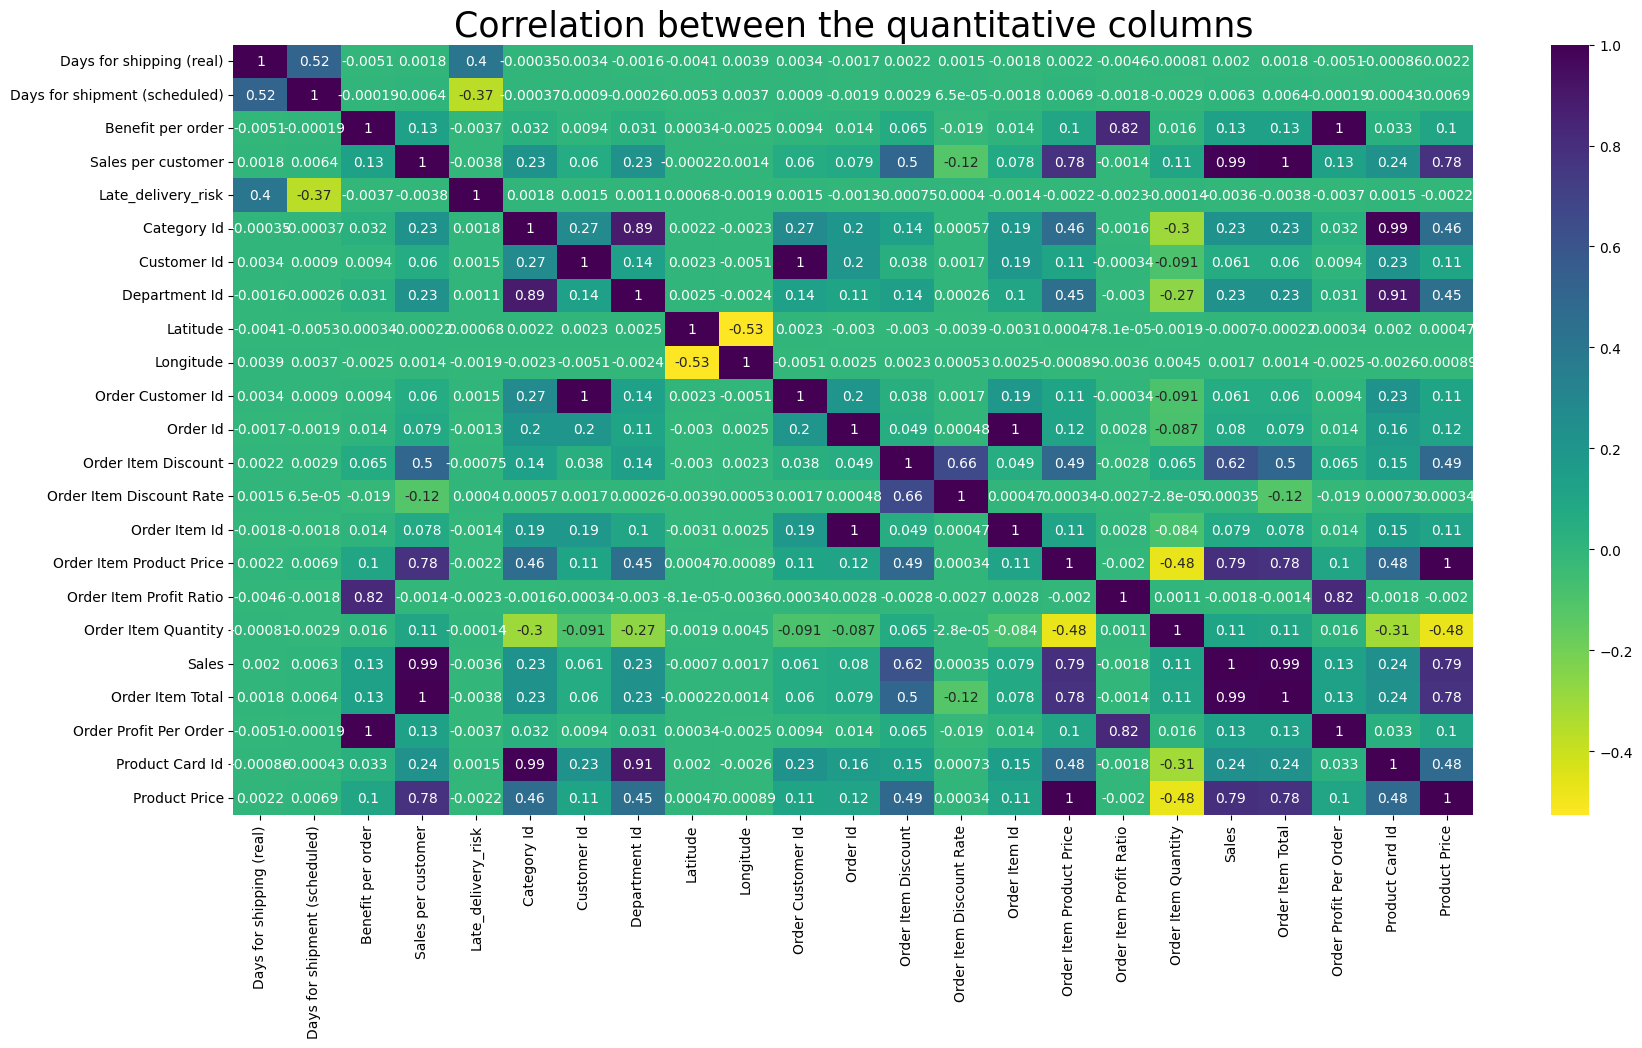

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

data_numbers = data.select_dtypes(include=['number'])

plt.rcParams["figure.figsize"] = 20,10
sb.heatmap(data_numbers.corr(),cmap='viridis_r',annot= True)
plt.title("Correlation between the quantitative columns",size = 25);

Considering every single entry as unique transaction

## EDA

In [ ]:
data['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [ ]:
grouped_data = data.groupby('Department Name')['Customer Segment'].value_counts()
grouped_data

Department Name     Customer Segment
Apparel             Consumer            25327
                    Corporate           14847
                    Home Office          8824
Book Shop           Consumer              179
                    Corporate             129
                    Home Office            97
Discs Shop          Consumer             1049
                    Corporate             571
                    Home Office           406
Fan Shop            Consumer            34635
                    Corporate           20373
                    Home Office         11853
Fitness             Consumer             1282
                    Corporate             775
                    Home Office           422
Footwear            Consumer             7582
                    Corporate            4373
                    Home Office          2570
Golf                Consumer            17234
                    Corporate           10069
                    Home Office          59

<Figure size 800x500 with 0 Axes>

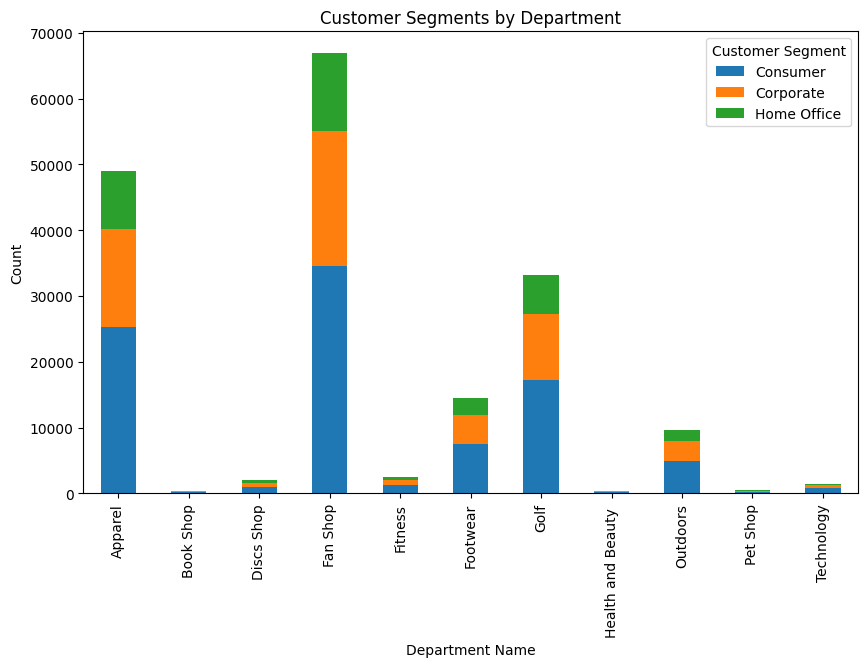

In [ ]:
grouped_data = data.groupby('Department Name')['Customer Segment'].value_counts().unstack()
plt.figure(figsize= (8,5))

# Plot the data
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Customer Segments by Department')
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.legend(title='Customer Segment', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [ ]:
data['Product Name'].value_counts()

Perfect Fitness Perfect Rip Deck                 24515
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Field & Stream Sportsman 16 Gun Fire Safe        17325
                                                 ...  
Stiga Master Series ST3100 Competition Indoor       27
SOLE E35 Elliptical                                 15
Bushnell Pro X7 Jolt Slope Rangefinder              11
Bowflex SelectTech 1090 Dumbbells                   10
SOLE E25 Elliptical                                 10
Name: Product Name, Length: 118, dtype: int64

In [ ]:
data['Category Name'].nunique()

50

In [ ]:
category_product = data.groupby('Category Name')['Product Name'].value_counts()

In [ ]:
# Displaying 10 product and their count based on grouping by category

df_category_product = category_product.reset_index(name='Count')

# Display the top 10 rows of the DataFrame
top_10_values = df_category_product.head(10)
print(top_10_values)

# df_category_product = category_product.reset_index(name='Count')

# # Display the DataFrame
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df_category_product)


         Category Name                                Product Name  Count
0          Accessories   Team Golf St. Louis Cardinals Putter Grip    313
1          Accessories  Team Golf Tennessee Volunteers Putter Grip    300
2          Accessories       Team Golf Texas Longhorns Putter Grip    299
3          Accessories   Team Golf Pittsburgh Steelers Putter Grip    295
4          Accessories  Team Golf San Francisco Giants Putter Grip    292
5          Accessories  Team Golf New England Patriots Putter Grip    281
6      As Seen on  TV!     Nike Men's Free TR 5.0 TB Training Shoe     68
7                Baby                                 Baby sweater    207
8  Baseball & Softball  adidas Men's F10 Messi TRX FG Soccer Cleat    305
9  Baseball & Softball       adidas Kids' F5 Messi FG Soccer Cleat    262


In [ ]:
data['Product Name'].nunique()

118

Text(0, 0.5, 'Count')

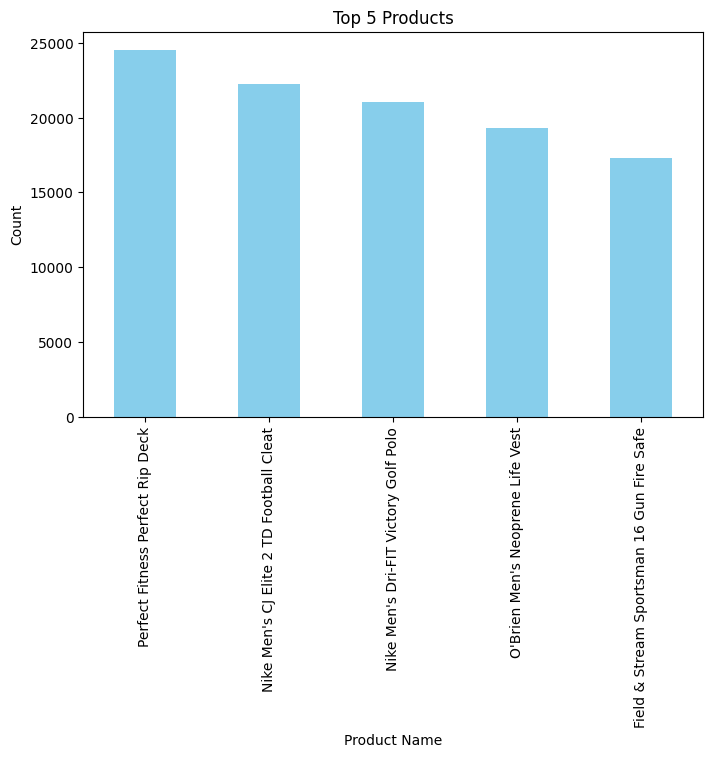

In [ ]:
top5_products = data['Product Name'].value_counts().head(5)
plt.figure(figsize= (8,5))

top5_products.plot(kind='bar', color='skyblue')

plt.title('Top 5 Products')
# plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Count')

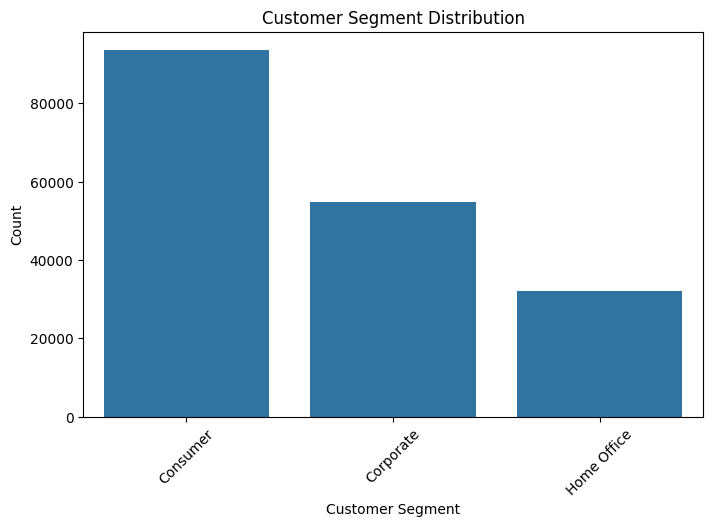

In [ ]:
customer_segment_counts = data['Customer Segment'].value_counts()
# Plotting Customer Segment Counts
plt.figure(figsize= (8,5))
sns.barplot(x=customer_segment_counts.index, y=customer_segment_counts.values)
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
customer_segment_counts #180519

Consumer       93504
Corporate      54789
Home Office    32226
Name: Customer Segment, dtype: int64

### Market share by region

In [ ]:
market_share = data['Market'].value_counts()
order_region_share = data['Order Region'].value_counts()

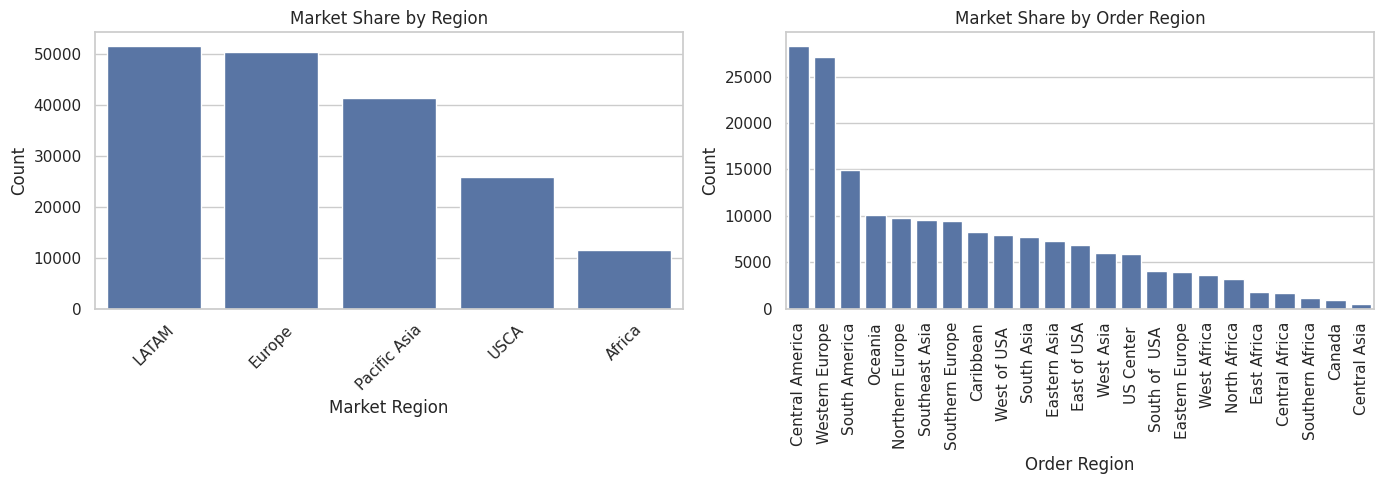

In [ ]:
plt.figure(figsize=(14,5))  # Adjust the figure size if needed

# First subplot
plt.subplot(1, 2, 1)
sns.barplot(x=market_share.index, y=market_share.values)
plt.title('Market Share by Region')
plt.xlabel('Market Region')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Second subplot
plt.subplot(1, 2, 2)
sns.barplot(x=order_region_share.index, y=order_region_share.values)
plt.title('Market Share by Order Region')
plt.xlabel('Order Region')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.show()

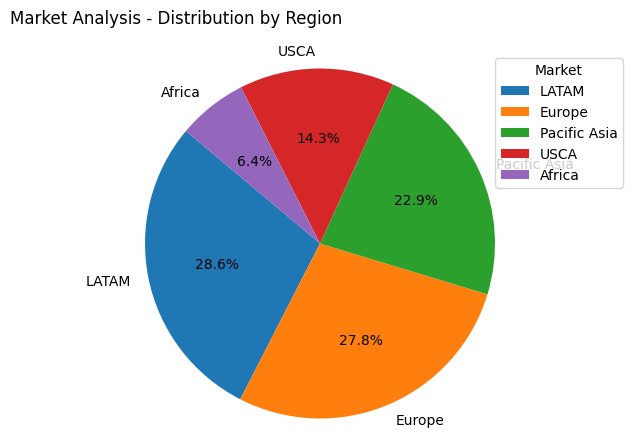

In [ ]:
plt.figure(figsize= (8,5))
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Analysis - Distribution by Region', loc='left', pad=20)
plt.axis('equal')
plt.legend(market_share.index, title='Market', loc='best')
plt.show()

### Delivery Status

In [ ]:
delivery_status = data['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64


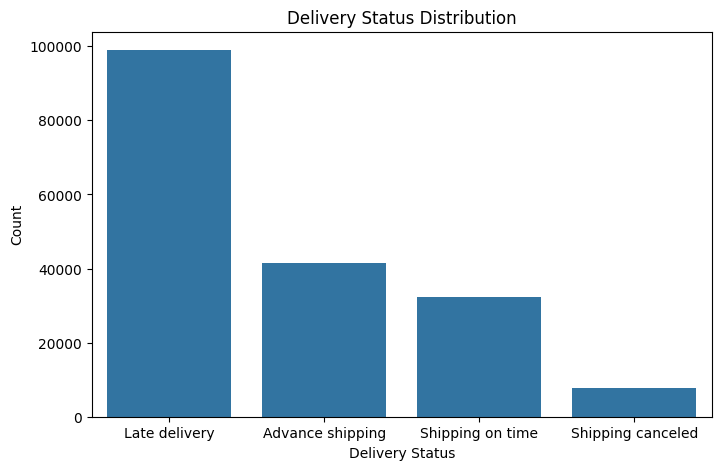

In [ ]:
plt.figure(figsize= (8,5))
sns.barplot(x=delivery_status.index, y=delivery_status.values)
plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Count')

print(delivery_status)

plt.show()

In [ ]:
shipping_mode = data['Shipping Mode'].value_counts()
shipping_mode

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64

In [ ]:
# data1 = df.groupby('Order Id')[['Delivery Status','Shipping Mode', 'Order Id']].agg()
df_grouped = data.groupby('Order Id').agg({
    'Delivery Status': lambda x: x.mode().iat[0],
    'Shipping Mode': lambda x: x.mode().iat[0],
    'Order Id': 'count'  # Count the occurrences of each order ID
}).rename(columns={'Order Id': 'Count'})
df_grouped.tail(5)

,Delivery Status,Shipping Mode,Count
Order Id,,,
77200,Late delivery,Standard Class,1
77201,Advance shipping,Standard Class,1
77202,Advance shipping,Standard Class,1
77203,Shipping on time,Standard Class,1
77204,Late delivery,Same Day,1


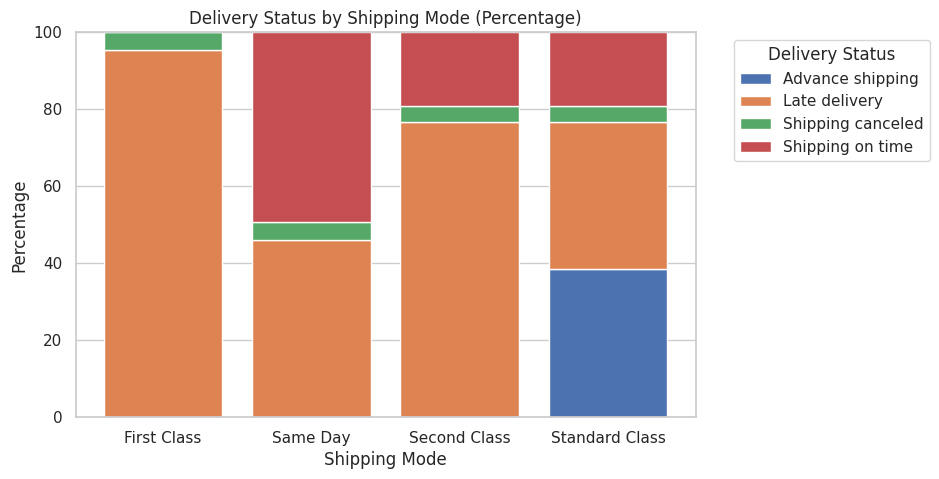

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

delivery_status_data = df_grouped['Delivery Status']
shipping_mode_data = df_grouped['Shipping Mode']

cross_tab = pd.crosstab(shipping_mode_data, delivery_status_data)
cross_tab_percent = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Visualize the cross-tabulation as a stacked bar chart with percentages
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

bottom = 0
for col in cross_tab_percent.columns:
    plt.bar(cross_tab_percent.index, cross_tab_percent[col], label=col, bottom=bottom)
    bottom += cross_tab_percent[col]

plt.title('Delivery Status by Shipping Mode (Percentage)')
plt.xlabel('Shipping Mode')
plt.ylabel('Percentage')
plt.legend(title='Delivery Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- most of the late deliveries are either first class or second class shipping mode
- Same day delivery are mostly on time shipping
- Almost equal percent of shipping cancelled for each shipping mode

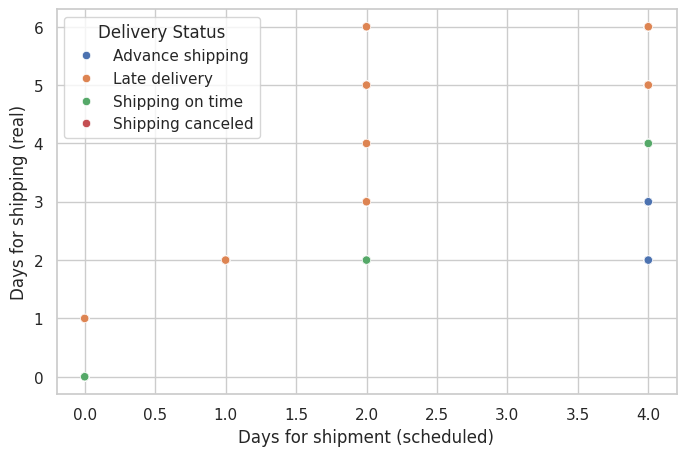

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='Days for shipment (scheduled)', y='Days for shipping (real)', hue='Delivery Status')
plt.show()

for orders with scheduled days of shipment = 2 :
    - most orders are delivered late i.e. takes 3,4,5,6 days
    - It has the highest delay i.e. of upto 4 days
    

### Suspected Fraud Orders Analysis

In [ ]:
suspected_fraud = data[data["Order Status"]=="SUSPECTED_FRAUD"]
suspected_fraud['Delivery Status'].value_counts()

Shipping canceled    4062
Name: Delivery Status, dtype: int64

In [ ]:
suspected_fraud = data[data["Order Status"]=="SUSPECTED_FRAUD"]["Type"]
suspected_fraud.value_counts()

TRANSFER    4062
Name: Type, dtype: int64

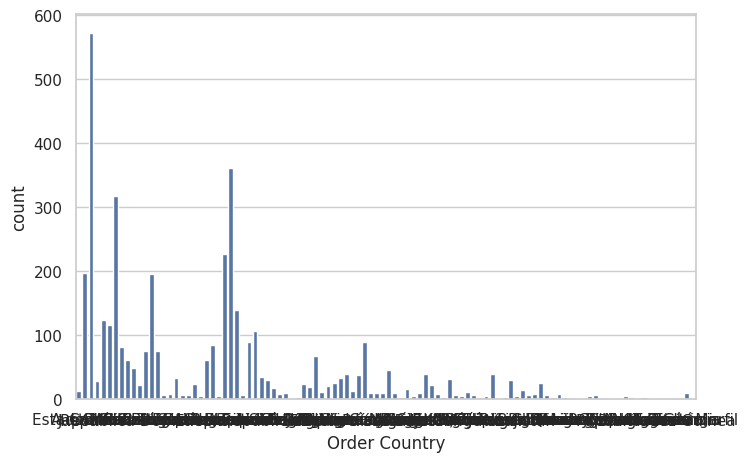

In [ ]:
plt.figure(figsize=(8,5))

sns.countplot(data=suspected_fraud,x="Order Country")
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
suspected_fraud.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
10,TRANSFER,6,2,130.580002,272.029999,Shipping canceled,0,73,Sporting Goods,Caguas,Puerto Rico,Germane,19483,Short,Corporate,PR,4058 Quiet Heights,2,Fitness,18.282845,-66.037056,Pacific Asia,Tokio,Japón,19483,1/13/2018 9:18,75930,55.720001,0.17,179245,327.75,0.48,1,327.75,272.029999,130.580002,Eastern Asia,Tokio,SUSPECTED_FRAUD,1360,Smart watch,327.75,1/19/2018 9:18,Second Class
24,TRANSFER,2,2,90.279999,288.420013,Shipping canceled,0,73,Sporting Goods,Billings,EE. UU.,Simone,19469,Vance,Corporate,MT,3176 Round Gate,2,Fitness,45.788311,-108.559410,Pacific Asia,Brisbane,Australia,19469,1/13/2018 4:24,75916,39.330002,0.12,179231,327.75,0.31,1,327.75,288.420013,90.279999,Oceania,Queensland,SUSPECTED_FRAUD,1360,Smart watch,327.75,1/15/2018 4:24,Second Class


EE. UU.        2413
Puerto Rico    1649
Name: Customer Country, dtype: int64


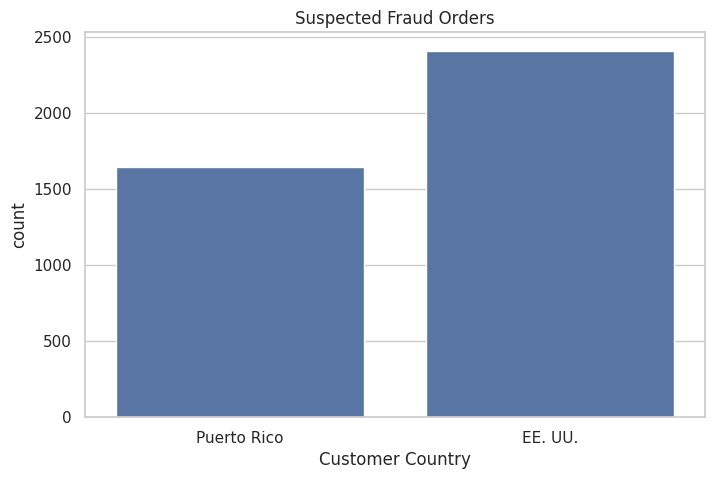

In [ ]:
print(suspected_fraud['Customer Country'].value_counts())
plt.figure(figsize=(8,5))

sns.countplot(data=suspected_fraud,x="Customer Country")
plt.title('Suspected Fraud Orders')
plt.show()

- For all suspected fraud order status, the shipping was cancelled
- Highest suspected orders were being shipped to Estados Unidos followed by Francia
- Highest suspected orders were ordered from EE. UU. customer country

In [ ]:
print(suspected_fraud['Order Country'].value_counts())

Estados Unidos    573
Francia           362
México            317
Alemania          227
Australia         197
                 ... 
Uzbekistán          1
Grecia              1
Bangladés           1
Somalia             1
Georgia             1
Name: Order Country, Length: 102, dtype: int64


<ipython-input-52-0e0fb8245240>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=80)


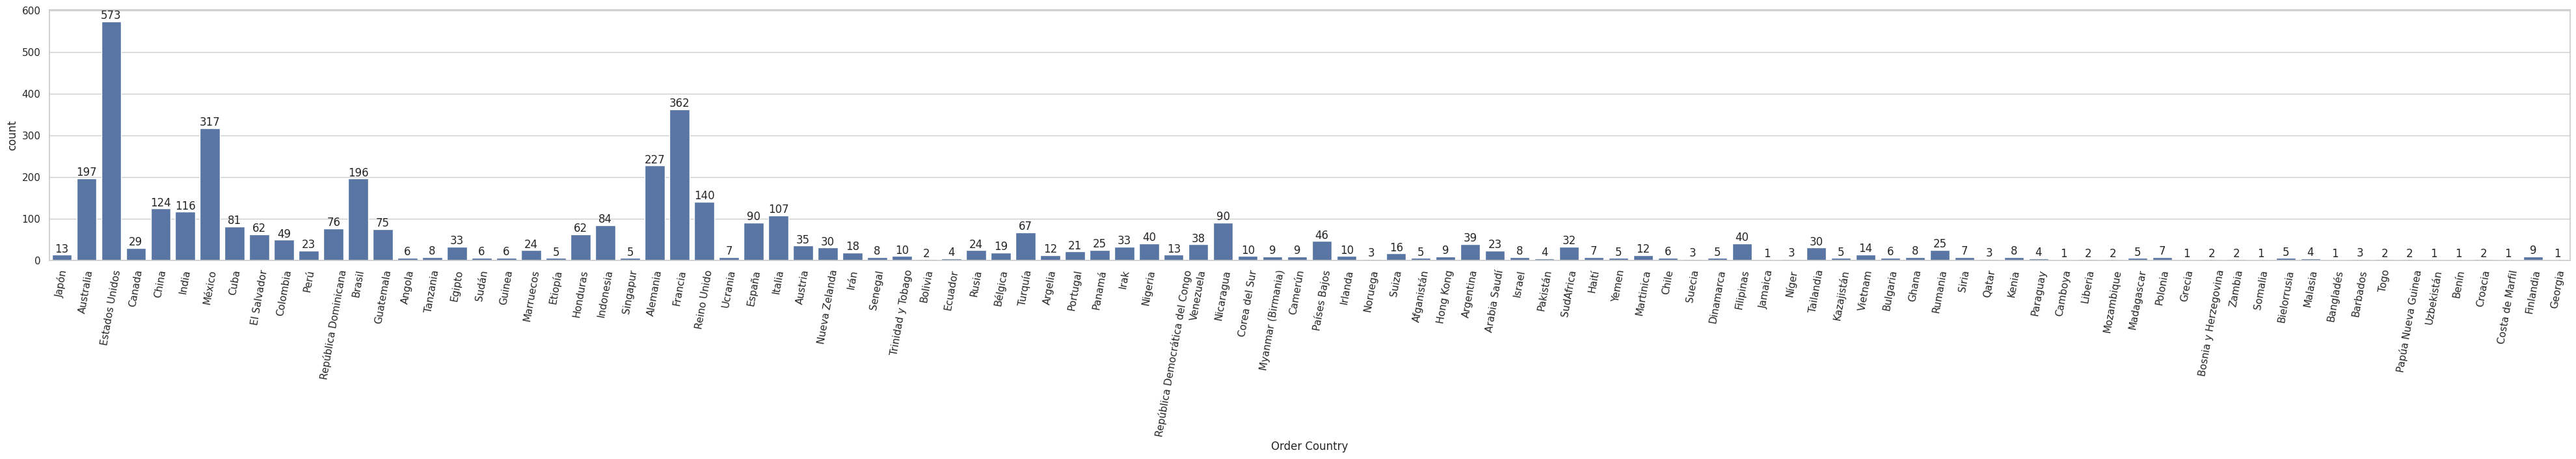

In [ ]:
plt.figure(figsize=(50,5))

ax=sns.countplot(data=suspected_fraud,x="Order Country")
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

### Products with Highest & Lowest Profit

In [ ]:
order_by_pnl = data.groupby(['Product Name'])['Benefit per order'].count().reset_index()
top10_product_by_profit = order_by_pnl.sort_values(by='Benefit per order',ascending=False).head(10)
top10_product_by_profit

,Product Name,Benefit per order
71,Perfect Fitness Perfect Rip Deck,24515
56,Nike Men's CJ Elite 2 TD Football Cleat,22246
59,Nike Men's Dri-FIT Victory Golf Polo,21035
67,O'Brien Men's Neoprene Life Vest,19298
24,Field & Stream Sportsman 16 Gun Fire Safe,17325
70,Pelican Sunstream 100 Kayak,15500
21,Diamondback Women's Serene Classic Comfort Bi,13729
61,Nike Men's Free 5.0+ Running Shoe,12169
102,Under Armour Girls' Toddler Spine Surge Runni,10617
25,Fighting video games,838


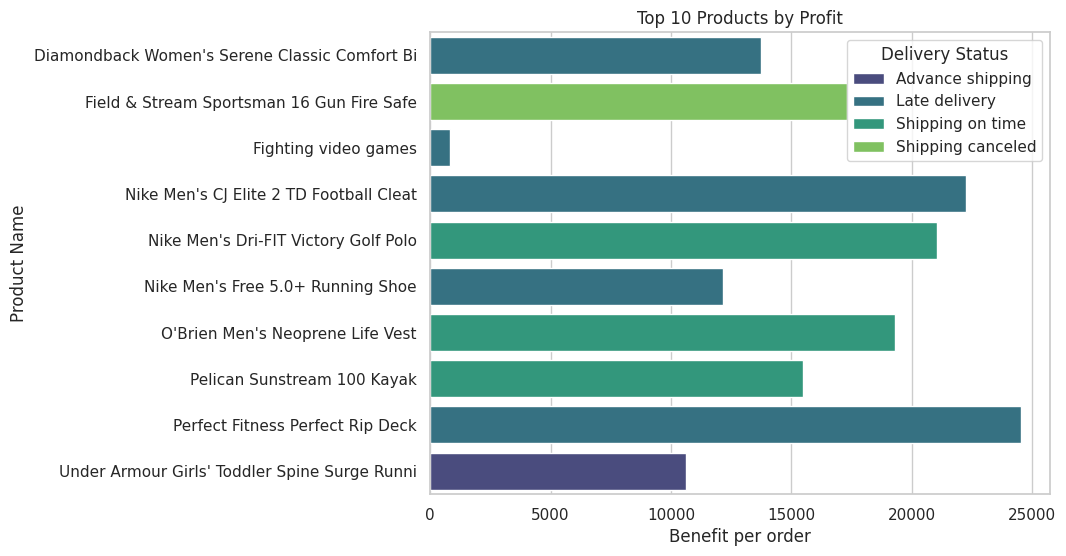

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.barplot(x=top10_product_by_profit['Benefit per order'], y=top10_product_by_profit['Product Name'], palette='viridis', hue=data['Delivery Status'])

plt.title('Top 10 Products by Profit')
plt.xlabel('Benefit per order')
plt.ylabel('Product Name')

plt.show()

The product with the most late deliveries is: Perfect Fitness Perfect Rip Deck with 13473 late deliveries.


In [ ]:
order_by_pnl = data.groupby(['Product Name'])['Benefit per order'].count().reset_index()
top10_product_by_loss = order_by_pnl.sort_values(by='Benefit per order',ascending=False).tail(10)
top10_product_by_loss

,Product Name,Benefit per order
30,Garmin Forerunner 910XT GPS Watch,35
93,Titleist Club Glove Travel Cover,34
36,GoPro HERO3+ Black Edition Camera,32
19,Diamondback Boys' Insight 24 Performance Hybr,29
20,Diamondback Girls' Clarity 24 Hybrid Bike 201,28
80,Stiga Master Series ST3100 Competition Indoor,27
77,SOLE E35 Elliptical,15
9,Bushnell Pro X7 Jolt Slope Rangefinder,11
76,SOLE E25 Elliptical,10
4,Bowflex SelectTech 1090 Dumbbells,10


<ipython-input-56-9d8819b17a8a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Benefit per order', y='Product Name', data=top10_product_by_loss, palette='viridis')


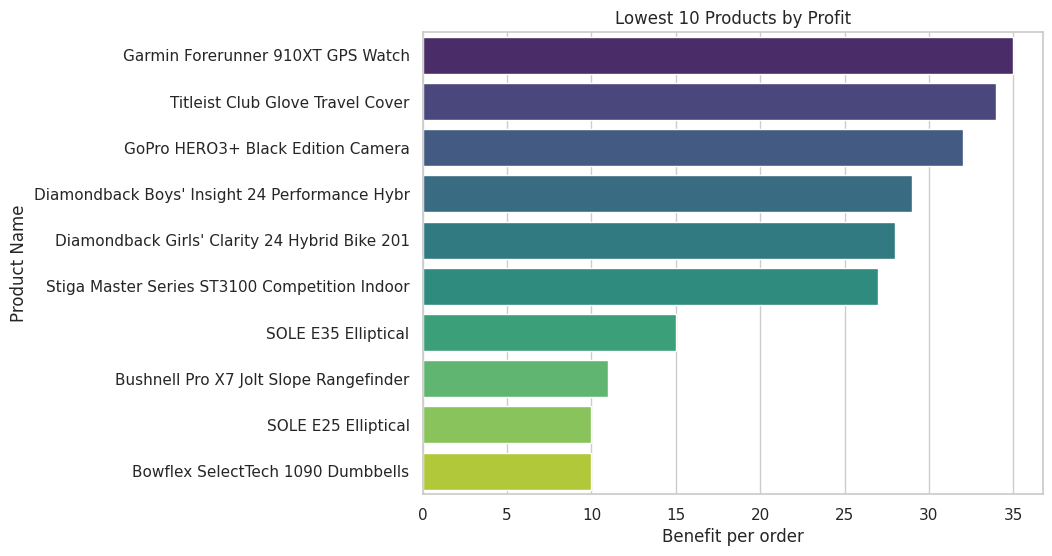

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.barplot(x='Benefit per order', y='Product Name', data=top10_product_by_loss, palette='viridis')

plt.title('Lowest 10 Products by Profit')
plt.xlabel('Benefit per order')
plt.ylabel('Product Name')

plt.show()

### Distribution by Category of Product

In [ ]:
product_by_category = data.groupby(['Category Name'])['Order Id'].count().reset_index(name='Order count').sort_values(by='Order count',ascending=False)

product_by_category.head(5)

,Category Name,Order count
12,Cleats,24551
34,Men's Footwear,22246
47,Women's Apparel,21035
30,Indoor/Outdoor Games,19298
18,Fishing,17325


<ipython-input-58-be76a3fe0885>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order count', y='Category Name', data=product_by_category, palette='viridis')


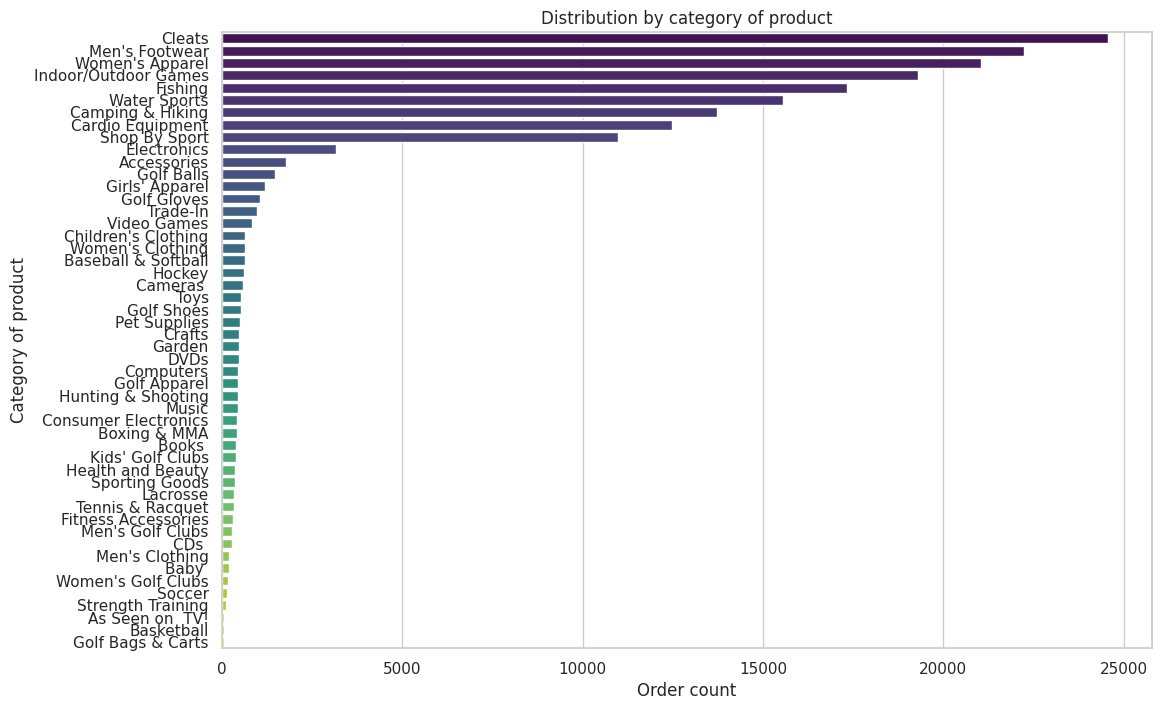

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))

sns.barplot(x='Order count', y='Category Name', data=product_by_category, palette='viridis')

plt.title('Distribution by category of product')
plt.xlabel('Order count')
plt.ylabel('Category of product')

plt.show()

###**Customer Segmentation**

In [ ]:
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Total']


In [ ]:
data['order date (DateOrders)'].max() # Calculating when the last order come to check recency

'9/9/2017 9:50'

In [ ]:
import datetime as dt

# Convert it to datetime format
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Calculate the maximum order date to find the latest order
latest_order_date = data['order date (DateOrders)'].max()

print(latest_order_date)
# Assuming the present time is the time when you are calculating recency

present = dt.datetime(2018,2,1)


2018-01-31 23:38:00


In [ ]:
# Grouping all values into new data frame named customer segmentation
Customer_seg = data.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x: (present - x.max()).days, 'Order Id': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
#Changing order dates to int format
Customer_seg['order date (DateOrders)'] = Customer_seg['order date (DateOrders)'].astype(int)
# Renaming columns as R_Value,F_Value,M_Value
Customer_seg.rename(columns={'order date (DateOrders)': 'R_Value',
                         'Order Id': 'F_Value',
                         'TotalPrice': 'M_Value'}, inplace=True)
Customer_seg.head()

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032


R_Value(Recency) indicates how much time elapsed since a customer last order.

F_Value(Frequency) indicates how many times a customer ordered.

M_Value(Monetary value) tells us how much a customer has spent purchasing items.

In [ ]:
quantiles = Customer_seg.quantile(q=[0.25,0.5,0.75]) #Dividing RFM data into four quartiles
quantiles = quantiles.to_dict()
quantiles

{'R_Value': {0.25: 75.0, 0.5: 159.0, 0.75: 307.0},
 'F_Value': {0.25: 1.0, 0.5: 7.0, 0.75: 15.0},
 'M_Value': {0.25: 258.0400085, 0.5: 2573.794999195, 0.75: 6003.142553865}}

In [ ]:
# R_Score should be minimum so 1st quantile is set as 1.
def R_Score(a,b,c):
    if a <= c[b][0.25]:
        return 4
    elif a <= c[b][0.50]:
        return 3
    elif a <= c[b][0.75]:
        return 2
    else:
        return 1
# The higher the F_Score,M_Score the better so 1st quantile is set as 4.
def FM_Score(x,y,z):
    if x <= z[y][0.25]:
        return 1
    elif x <= z[y][0.50]:
        return 2
    elif x <= z[y][0.75]:
        return 3
    else:
        return 4

In [ ]:
# New column for R_Score to indicate numerical score between 1 to 4.
Customer_seg['R_Score'] = Customer_seg['R_Value'].apply(R_Score, args=('R_Value',quantiles))
# New column for F_Score to indicate numerical score between 1 to 4.
Customer_seg['F_Score'] = Customer_seg['F_Value'].apply(FM_Score, args=('F_Value',quantiles))
# New column for M_Score to indicate numerical score between 1 to 4.
Customer_seg['M_Score'] = Customer_seg['M_Value'].apply(FM_Score, args=('M_Value',quantiles))
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,2362.250061,1,1,2
2,136,10,2842.700073,3,3,3
3,229,18,6143.760057,2,4,4
4,380,14,4370.629991,1,3,3
5,457,7,2993.790032,1,2,3


In [ ]:
#Adding R,F,M Scores to one new column
Customer_seg['RFM_Score'] = Customer_seg.R_Score.astype(str)+ Customer_seg.F_Score.astype(str) + Customer_seg.M_Score.astype(str)
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score
Order Customer Id,,,,,,,
1,792,1,2362.250061,1,1,2,112
2,136,10,2842.700073,3,3,3,333
3,229,18,6143.760057,2,4,4,244
4,380,14,4370.629991,1,3,3,133
5,457,7,2993.790032,1,2,3,123


In [ ]:
count=Customer_seg['RFM_Score'].unique()
print(count)# Printing all Unique values
len(count)# Total count

['112' '333' '244' '133' '123' '134' '344' '233' '121' '343' '144' '224'
 '143' '122' '234' '132' '222' '243' '334' '332' '223' '322' '323' '232'
 '111' '124' '212' '312' '211' '221' '311' '412' '411']


33

In [ ]:
# Calculate RFM_Score
Customer_seg['RFM_Total_Score'] = Customer_seg[['R_Score','F_Score','M_Score']].sum(axis=1)
Customer_seg['RFM_Total_Score'].unique()

array([ 4,  9, 10,  7,  6,  8, 11,  5,  3])

In [ ]:
# Define rfm_level function
def RFM_Total_Score(df):

    if (df['RFM_Total_Score'] >= 11):# For RFM score with values 11,12
        return  'Very Frequent High Value Customers'
    elif (df['RFM_Total_Score'] == 10):# For RFM score with value 10
        return 'Frequent High Value Customers'
    elif (df['RFM_Total_Score'] == 9): # For RFM score with value 9
        return 'Recent Customers'
    elif (df['RFM_Total_Score'] == 8): # For RFM score with value 8
         return 'Promising'
    elif (df['RFM_Total_Score'] == 7): # For RFM score with value 7
        return 'Customers Needing Attention'
    elif (df['RFM_Total_Score'] == 6): # For RFM score with value 6
        return 'Cant lose them'
    elif (df['RFM_Total_Score'] == 5): # For RFM score with value 5
        return 'At Risk'
    else:                               # For RFM score with value less than 5

        return 'Lost'
# Create a new variable RFM_Level
Customer_seg['Customer_Segmentation'] =Customer_seg.apply(RFM_Total_Score, axis=1)
# Print the header with top 5 rows to the console
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
1,792,1,2362.250061,1,1,2,112,4,Lost
2,136,10,2842.700073,3,3,3,333,9,Recent Customers
3,229,18,6143.760057,2,4,4,244,10,Frequent High Value Customers
4,380,14,4370.629991,1,3,3,133,7,Customers Needing Attention
5,457,7,2993.790032,1,2,3,123,6,Cant lose them


In [ ]:
Customer_seg['Customer_Segmentation'].value_counts()

Cant lose them                        6855
Customers Needing Attention           3490
Recent Customers                      2478
Frequent High Value Customers         2345
Promising                             2273
At Risk                               2178
Very Frequent High Value Customers     916
Lost                                   117
Name: Customer_Segmentation, dtype: int64

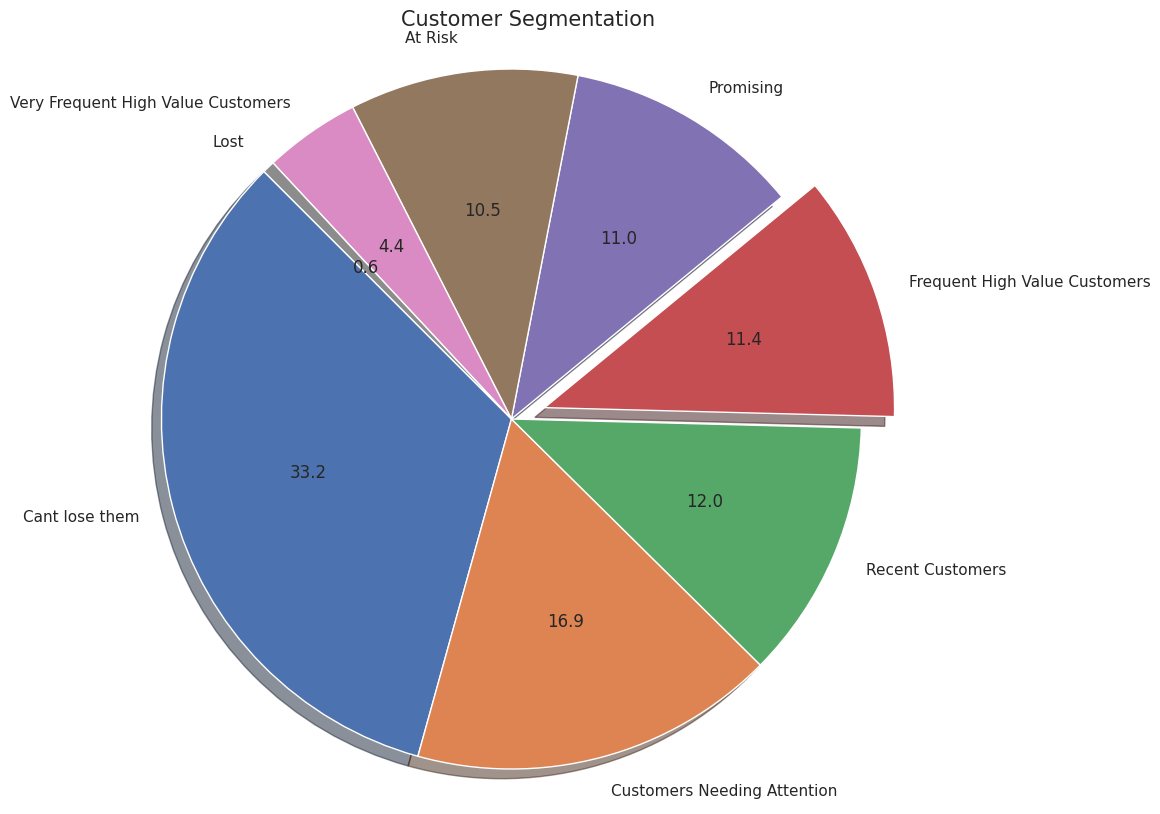

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment
Customer_seg['Customer_Segmentation'].value_counts().plot.pie(figsize=(10,10),
                                        startangle=135, explode=(0,0,0,0.1,0,0,0,0),autopct='%.1f',shadow=True)
plt.title("Customer Segmentation",size=15)
plt.ylabel(" ")
plt.axis('equal')
plt.show()

Since total customers are divided into 9 segments it can be seen that, 11.4% customers are at risk of losing them as customers and 11% customers needs attention else even they will be lost eventually.It can be seen that 4.4% of customers are already lost.

# Actionable Insight:

Understanding Lost Customers:

The "Lost" segment includes customers who were once engaged but have become inactive. Understanding the reasons behind their disengagement and implementing re-engagement strategies may help win them back.


---


Identification of High-Value Customers:

The "Frequent High Value Customers" and "Very Frequent High Value Customers" segments identify customers with both high frequency and high monetary value. Tailoring marketing strategies to retain and satisfy these customers is essential.

Segment-Specific Strategies:
Each segment requires a unique approach. For example, re-engagement strategies for the "Lost" segment, retention strategies for "Can't Lose Them," and targeted promotions for "Promising" customers.

### Shipping Mode Analysis

In [ ]:
shipping_mode_counts = data['Shipping Mode'].value_counts()
shipping_mode_counts

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64

Observation - Standard Class is very commonly used and as expectation is the general choice

In [ ]:
grouped_data = data.groupby('Order Id').first().reset_index()
grouped_data.head(10)

,Order Id,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,TotalPrice
0,1,CASH,2,4,88.790001,239.979996,Advance shipping,0,43,Camping & Hiking,Hickory,EE. UU.,Mary,11599,Malone,Consumer,NC,8708 Indian Horse Highway,7,Fan Shop,35.776661,-81.362625,LATAM,Mexico City,México,11599,2015-01-01 00:00:00,60.000000,0.20,1,299.980011,0.37,1,299.980011,239.979996,88.790001,Central America,Distrito Federal,CLOSED,957,Diamondback Women's Serene Classic Comfort Bi,299.980011,1/3/2015 0:00,Standard Class,239.979996
1,2,PAYMENT,3,4,91.180000,193.990005,Advance shipping,0,48,Water Sports,Chicago,EE. UU.,David,256,Rodriguez,Consumer,IL,7605 Tawny Horse Falls,7,Fan Shop,41.832722,-87.980484,LATAM,Dos Quebradas,Colombia,256,2015-01-01 00:21:00,6.000000,0.03,2,199.990005,0.47,1,199.990005,193.990005,91.180000,South America,Risaralda,PENDING_PAYMENT,1073,Pelican Sunstream 100 Kayak,199.990005,1/4/2015 0:21,Standard Class,193.990005
2,4,CASH,5,4,4.100000,40.980000,Late delivery,1,40,Accessories,San Antonio,EE. UU.,Brian,8827,Wilson,Home Office,TX,8396 High Corners,6,Outdoors,29.520010,-98.637413,LATAM,Dos Quebradas,Colombia,8827,2015-01-01 01:03:00,9.000000,0.18,5,24.990000,0.10,2,49.980000,40.980000,4.100000,South America,Risaralda,CLOSED,897,Team Golf New England Patriots Putter Grip,24.990000,1/6/2015 1:03,Standard Class,81.959999
3,5,DEBIT,6,4,34.939999,109.190002,Late delivery,1,18,Men's Footwear,Caguas,Puerto Rico,Mary,11318,Henry,Consumer,PR,3047 Silent Embers Maze,4,Apparel,18.234238,-66.370605,LATAM,Dos Quebradas,Colombia,11318,2015-01-01 01:24:00,20.799999,0.16,13,129.990005,0.32,1,129.990005,109.190002,34.939999,South America,Risaralda,COMPLETE,403,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,1/7/2015 1:24,Standard Class,109.190002
4,7,DEBIT,3,2,120.949997,251.979996,Late delivery,1,43,Camping & Hiking,Miami,EE. UU.,Mary,4530,Smith,Consumer,FL,1073 Green Leaf Green,7,Fan Shop,25.888525,-80.172943,LATAM,São Paulo,Brasil,4530,2015-01-01 02:06:00,48.000000,0.16,15,299.980011,0.48,1,299.980011,251.979996,120.949997,South America,São Paulo,COMPLETE,957,Diamondback Women's Serene Classic Comfort Bi,299.980011,1/4/2015 2:06,Second Class,251.979996
5,8,TRANSFER,4,4,-131.149994,163.929993,Shipping on time,0,46,Indoor/Outdoor Games,Caguas,Puerto Rico,Mary,2911,Smith,Corporate,PR,9166 Golden Nectar Corner,7,Fan Shop,18.222729,-66.370529,LATAM,São Paulo,Brasil,2911,2015-01-01 02:27:00,35.990002,0.18,19,49.980000,-0.80,4,199.919998,163.929993,-131.149994,South America,São Paulo,PROCESSING,1014,O'Brien Men's Neoprene Life Vest,49.980000,1/5/2015 2:27,Standard Class,655.719971
6,9,PAYMENT,5,4,96.000000,199.990005,Late delivery,1,48,Water Sports,Lakewood,EE. UU.,Mary,5657,James,Consumer,OH,1389 Dusty Circuit,7,Fan Shop,41.484669,-81.776245,LATAM,São Paulo,Brasil,5657,2015-01-01 02:48:00,0.000000,0.00,23,199.990005,0.48,1,199.990005,199.990005,96.000000,South America,São Paulo,PENDING_PAYMENT,1073,Pelican Sunstream 100 Kayak,199.990005,1/6/2015 2:48,Standard Class,199.990005
7,10,PAYMENT,6,4,28.730000,110.489998,Late delivery,1,18,Men's Footwear,Memphis,EE. UU.,Joshua,5648,Smith,Corporate,TN,864 Iron Spring Stead,4,Apparel,35.119781,-89.945740,LATAM,São Paulo,Brasil,5648,2015-01-01 03:09:00,19.500000,0.15,26,129.990005,0.26,1,129.990005,110.489998,28.730000,South America,São Paulo,PENDING_PAYMENT,403,Nike Men's C

In [ ]:
#data.groupby('Order Id')['Delivery Status'].value_counts()

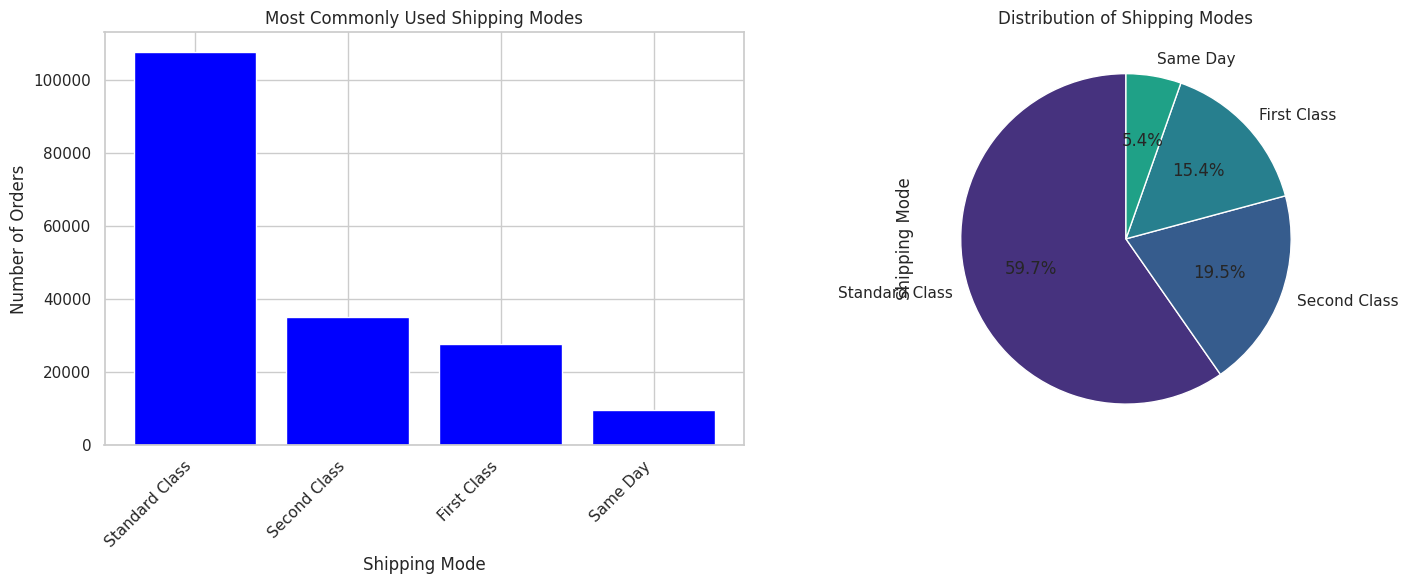

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(shipping_mode_counts.index, shipping_mode_counts.values, color='blue')
plt.title('Most Commonly Used Shipping Modes')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
data['Shipping Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Shipping Modes')

plt.tight_layout()
plt.show()


In [ ]:
# Observation - Standard Class is very commonly used and as expectation is the general choice
# Observation - Checking the %age distribution for the above numbers observed

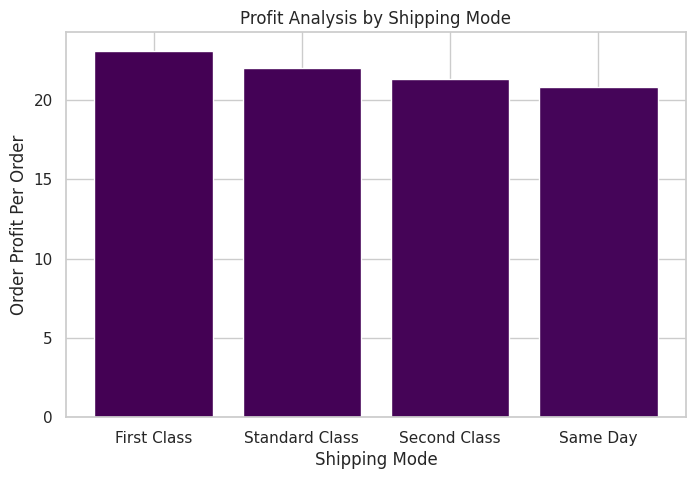

In [ ]:
profit_data = data.groupby('Shipping Mode')['Order Profit Per Order'].mean().reset_index()
profit_data = profit_data.sort_values(by='Order Profit Per Order', ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(profit_data['Shipping Mode'], profit_data['Order Profit Per Order'], color=plt.cm.viridis.colors)
plt.title('Profit Analysis by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Order Profit Per Order')
plt.show()


In [ ]:
# Observation - The average profits made for different shipping modes throughout

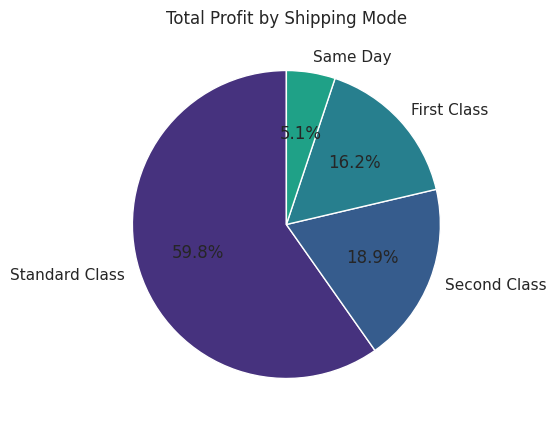

In [ ]:
profit_data_sum = data.groupby('Shipping Mode')['Order Profit Per Order'].sum().reset_index()
profit_data_sum = profit_data_sum.sort_values(by='Order Profit Per Order', ascending=False)

plt.figure(figsize=(8, 5))
plt.pie(profit_data_sum['Order Profit Per Order'], labels=profit_data_sum['Shipping Mode'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"))
plt.title('Total Profit by Shipping Mode')
plt.show()

In [ ]:
# Observation - The total profit %age distribution among the various shipping modes - as expected, since the
# count of orders are more in the Standard Class shipping mode, and the average profits are fairly similar
# thus the total profit ratio is also high for the Standard Class shipping mode

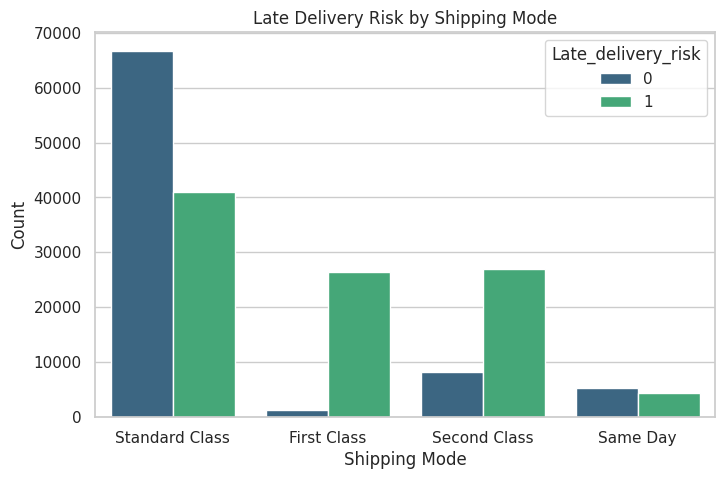

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Shipping Mode', hue='Late_delivery_risk', data=data, palette='viridis')
plt.title('Late Delivery Risk by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.show()


In [ ]:
# 0 - Order not late
# 1 - Order sending is late
# Observation - Almost all the shipping mode, has a good ratio for the late sending category

<ipython-input-83-542d6504af40>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Shipping Mode', y='Shipping Time Difference', data=data, palette='viridis')


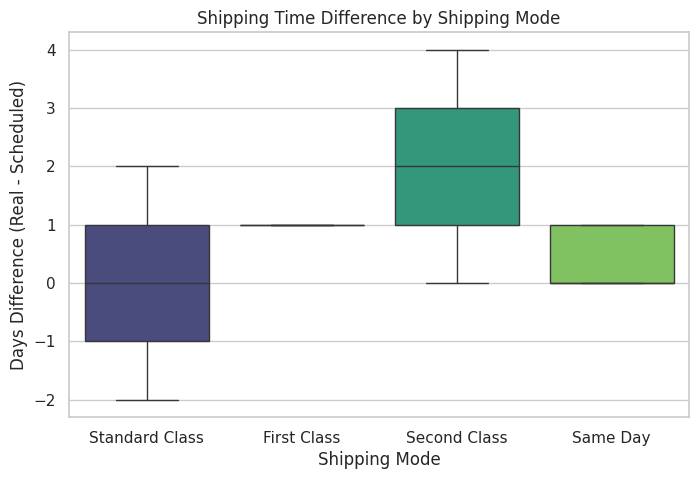

In [ ]:
data['Shipping Time Difference'] = data['Days for shipping (real)'] - data['Days for shipment (scheduled)']

plt.figure(figsize=(8, 5))
sns.boxplot(x='Shipping Mode', y='Shipping Time Difference', data=data, palette='viridis')
plt.title('Shipping Time Difference by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Days Difference (Real - Scheduled)')
plt.show()

In [ ]:
# Observation - We see, that there is a delay in the delivery i.e. real - scheduled
# Now, under 'Same Day', it is expected to be 'prime' or any such subscription where, the delivery is to be done within
# same day, but there also we see a delay of 1 day

# SCOPE OF IMPROVEMENT
# Focusing on the 'Same Day' - since the subscription is attached to it, and might loose valuable customers for this

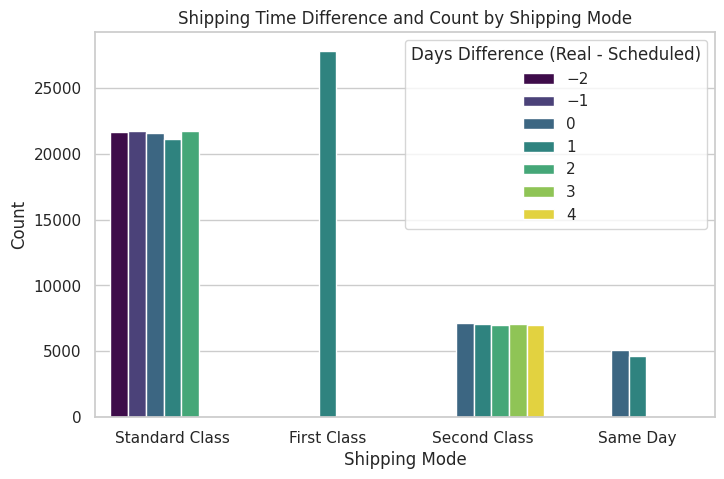

In [ ]:
data['Shipping Time Difference'] = data['Days for shipping (real)'] - data['Days for shipment (scheduled)']

plt.figure(figsize=(8, 5))
sns.countplot(x='Shipping Mode', hue='Shipping Time Difference', data=data, palette='viridis', edgecolor='w')
plt.title('Shipping Time Difference and Count by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.legend(title='Days Difference (Real - Scheduled)')
plt.show()

In [ ]:
# Observation - We can see the distribution of the delay in days for different shipping mode
# Observation - Observed that for 'Same Day', there are almost half instances out of all, where the devilvery was delayed

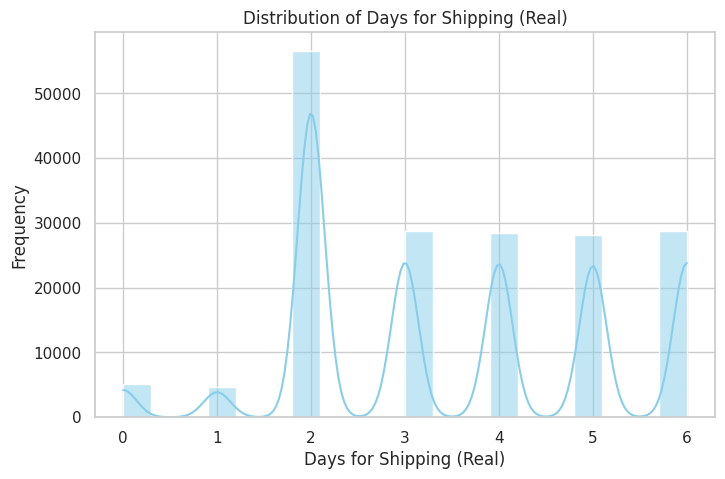

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Days for shipping (real)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Days for Shipping (Real)')
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Observation - Simple observation for various number of days taken for shipping vs the frequency

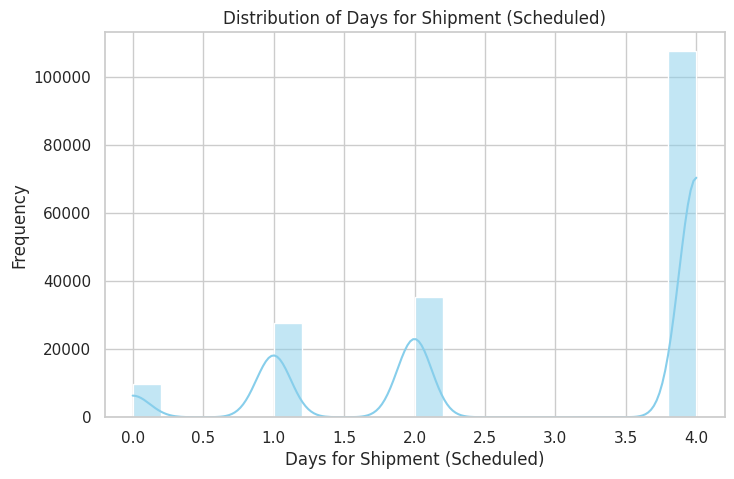

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Days for shipment (scheduled)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Days for Shipment (Scheduled)')
plt.xlabel('Days for Shipment (Scheduled)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Observation - Simple observation for various number of days taken (scheduled) for shipping vs the frequency
# We can see a difference between the scheduled and real, where the scheduled are ranging from 0 - 4,
# real ranges from 0 to 6

Text(0, 0.5, 'Count')

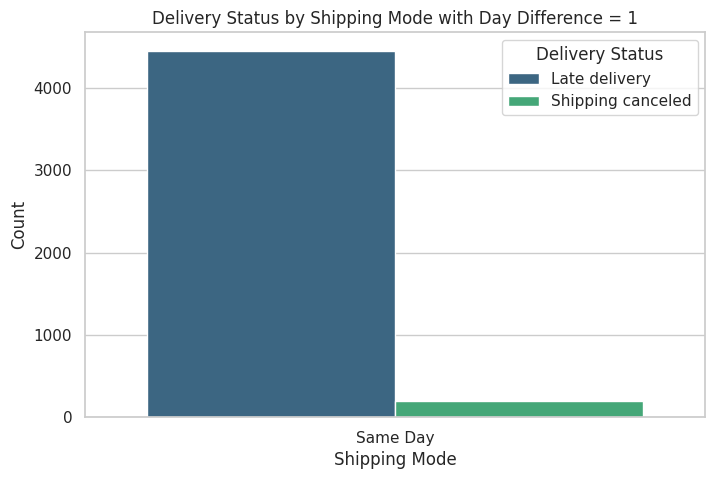

In [ ]:
filtered_data = data[(data['Days for shipping (real)'] - data['Days for shipment (scheduled)'] == 1)
                    & (data['Shipping Mode'] == 'Same Day')]

plt.figure(figsize=(8, 5))

sns.countplot(x='Shipping Mode', hue='Delivery Status', data=filtered_data, palette='viridis')
plt.title('Delivery Status by Shipping Mode with Day Difference = 1')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')

In [ ]:
# Observation - We observed the different categories of delivery status possible for the delay in shipping, where the shipping mode is
# 'Same Day'
# 'Late Delivery' - is the common possibility

<ipython-input-93-d9b9a036aa13>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='viridis')


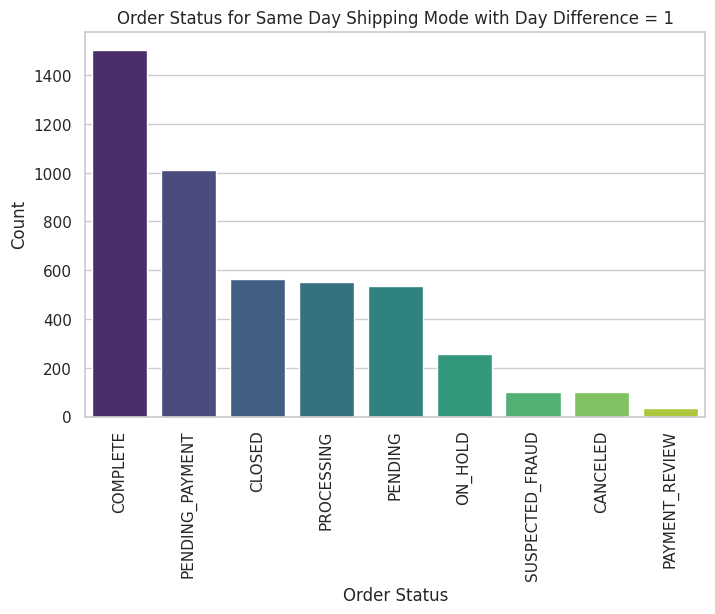

In [ ]:
filtered_data = data[(data['Days for shipping (real)'] - data['Days for shipment (scheduled)'] == 1)
                    & (data['Shipping Mode'] == 'Same Day')]

order_status_counts = filtered_data['Order Status'].value_counts()
order_status_counts = order_status_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 5))

sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='viridis')
plt.title('Order Status for Same Day Shipping Mode with Day Difference = 1')
plt.xlabel('Order Status')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.show()

In [ ]:
# Observation - We observed the different categories of order status possible for the delay in shipping, where the shipping mode is
# 'Same Day'
# 'Complete', followed by 'Pending_Payment' are among the highest

In [ ]:
order_status_counts = data['Order Status'].value_counts()
order_status_counts

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [ ]:
fraud_counts = data[data['Order Status'] == 'SUSPECTED_FRAUD']['Shipping Mode'].value_counts()
fraud_counts

Standard Class    2408
Second Class       749
First Class        686
Same Day           219
Name: Shipping Mode, dtype: int64

<ipython-input-97-2b7f6d543d33>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Shipping Mode', data=fraud_counts_fraud, palette='viridis')


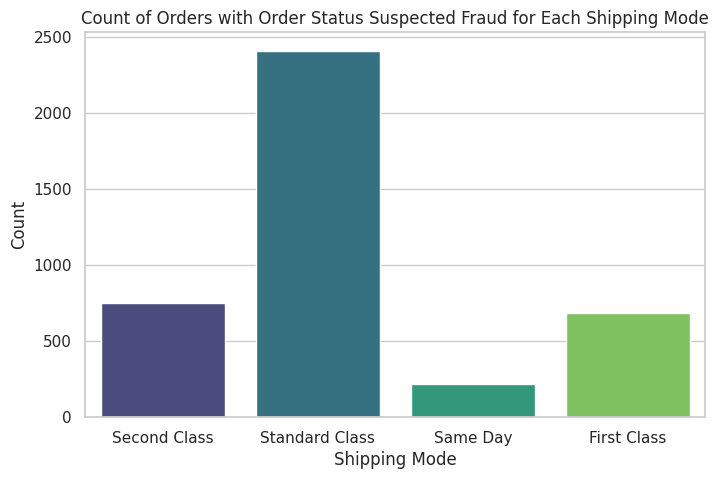

In [ ]:
fraud_counts_fraud = data[data['Order Status'] == 'SUSPECTED_FRAUD']

plt.figure(figsize=(8, 5))
sns.countplot(x='Shipping Mode', data=fraud_counts_fraud, palette='viridis')
plt.title('Count of Orders with Order Status Suspected Fraud for Each Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.show()

In [ ]:
# Observation - Fraud Detection in Shipping Mode can be an exploratory area

In [ ]:
shipping_mode_counts = data['Shipping Mode'].value_counts()
shipping_mode_counts

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64

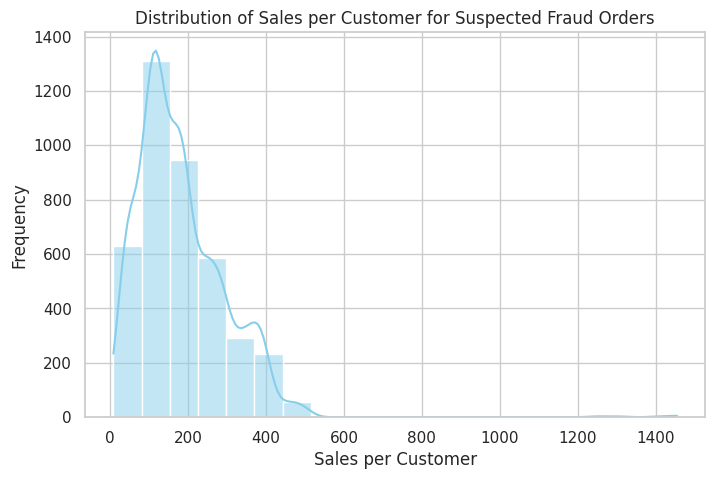

In [ ]:
fraud_data = data[data['Order Status'] == 'SUSPECTED_FRAUD']

plt.figure(figsize=(8, 5))
sns.histplot(fraud_data['Sales per customer'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sales per Customer for Suspected Fraud Orders')
plt.xlabel('Sales per Customer')
plt.ylabel('Frequency')
plt.show()

<Axes: title={'center': 'Top 10 Highest Fraud Customers'}, xlabel='Customer Fname,Customer Lname'>

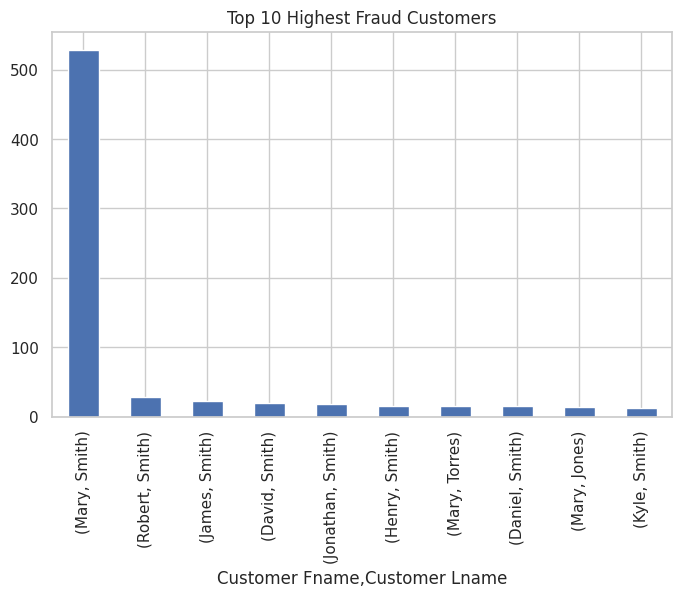

In [ ]:
# fraud_data['Customer Fname'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Highest Fraud Customers")
fraud_data[['Customer Fname', 'Customer Lname']].value_counts().nlargest(10).plot.bar(figsize=(8,5), title="Top 10 Highest Fraud Customers")


In [ ]:
# Filter entries for Mary Smith
mary_smith_entries = fraud_data[(fraud_data['Customer Fname'] == 'Mary') & (fraud_data['Customer Lname'] == 'Smith')]

mary_smith_entries

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,TotalPrice,Shipping Time Difference
687,TRANSFER,6,4,87.279999,193.949997,Shipping canceled,0,29,Shop By Sport,Caguas,Puerto Rico,Mary,2813,Smith,Consumer,PR,2585 Silent Autumn Landing,5,Golf,18.213350,-66.370575,LATAM,Atlixco,México,2813,2015-02-22 21:38:00,3625,6.000000,0.03,9026,39.990002,0.45,5,199.949997,193.949997,87.279999,Central America,Puebla,SUSPECTED_FRAUD,627,Under Armour Girls' Toddler Spine Surge Runni,39.990002,2/28/2015 21:38,Standard Class,969.749984,2
749,TRANSFER,3,4,-63.160000,191.970001,Shipping canceled,0,17,Cleats,Brooklyn,EE. UU.,Mary,9419,Smith,Consumer,NY,6269 Harvest Shadow Meadow,4,Apparel,40.665771,-73.892464,Africa,Cairo,Egipto,9419,2016-11-02 06:56:00,45987,47.990002,0.20,114931,59.990002,-0.33,4,239.960007,191.970001,-63.160000,North Africa,El Cairo,SUSPECTED_FRAUD,365,Perfect Fitness Perfect Rip Deck,59.990002,11/5/2016 6:56,Standard Class,767.880005,-1
754,TRANSFER,3,4,20.000000,160.000000,Shipping canceled,0,24,Women's Apparel,Brooklyn,EE. UU.,Mary,9419,Smith,Consumer,NY,6269 Harvest Shadow Meadow,5,Golf,40.665771,-73.892464,Africa,Cairo,Egipto,9419,2016-11-02 06:56:00,45987,40.000000,0.20,114932,50.000000,0.13,4,200.000000,160.000000,20.000000,North Africa,El Cairo,SUSPECTED_FRAUD,502,Nike Men's Dri-FIT Victory Golf Polo,50.000000,11/5/2016 6:56,Standard Class,640.000000,-1
1791,TRANSFER,2,4,81.470001,232.759995,Shipping canceled,0,17,Cleats,Tonawanda,EE. UU.,Mary,11073,Smith,Consumer,NY,475 Colonial Autoroute,4,Apparel,42.942249,-78.899590,Europe,Bordeaux,Francia,11073,2017-08-30 17:12:00,66636,7.200000,0.03,166570,59.990002,0.35,4,239.960007,232.759995,81.470001,Western Europe,Aquitania-Lemosín-Poitou-Charentes,SUSPECTED_FRAUD,365,Perfect Fitness Perfect Rip Deck,59.990002,9/1/2017 17:12,Standard Class,931.039978,-2
1893,TRANSFER,6,4,94.839996,278.950012,Shipping canceled,0,17,Cleats,Caguas,Puerto Rico,Mary,7270,Smith,Consumer,PR,100 Clear Forest Highway,4,Apparel,18.214865,-66.370583,Pacific Asia,Nellore,India,7270,2015-12-26 19:38:00,24650,21.000000,0.07,61721,59.990002,0.34,5,299.950012,278.950012,94.839996,South Asia,Andhra Pradesh,SUSPECTED_FRAUD,365,Perfect Fitness Perfect Rip Deck,59.990002,1/1/2016 19:38,Standard Class,1394.750061,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179429,TRANSFER,4,4,-28.610001,484.950012,Shipping canceled,0,9,Cardio Equipment,Caguas,Puerto Rico,Mary,1613,Smith,Consumer,PR,3307 Broad Beacon Wood,3,Footwear,18.202625,-66.370621,Africa,Mbandaka,República Democrática del Congo,1613,2016-11-12 12:32:00,46688,15.000000,0.03,116730,99.989998,-0.06,5,499.950012,484.950012,-28.610001,Central Africa,Équateur,SUSPECTED_FRAUD,191,Nike Men's Free 5.0+ Running Shoe,99.989998,11/16/2016 12:32,Standard Class,2424.750061,0
179750,TRANSFER,2,4,105.589996,351.980011,Shipping canceled,0,45,Fishing,Hanover,EE. UU.,Mary,4650,Smith,Consumer,PA,7683 Sunny Sky Field,7,Fan Shop,39.803162,-77.005989,Pacific Asia,Tamworth,Australia,4650,2016-02-27 17:58:00,28961,48.000000,0.12,72462,399.980011,0.30,1,399.980011,351.980011,105.589996,Oceania,Nueva Gales del Sur,SUSPECTED_FRAUD,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2/29/2016 

In [ ]:
amount = data[(data['Customer Fname'] == 'Mary')&(data['Customer Lname'] == 'Smith')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
amount['Sales'].sum()

102491.66191043999

<Axes: title={'center': 'Top 10 Highest Fraud Countries'}>

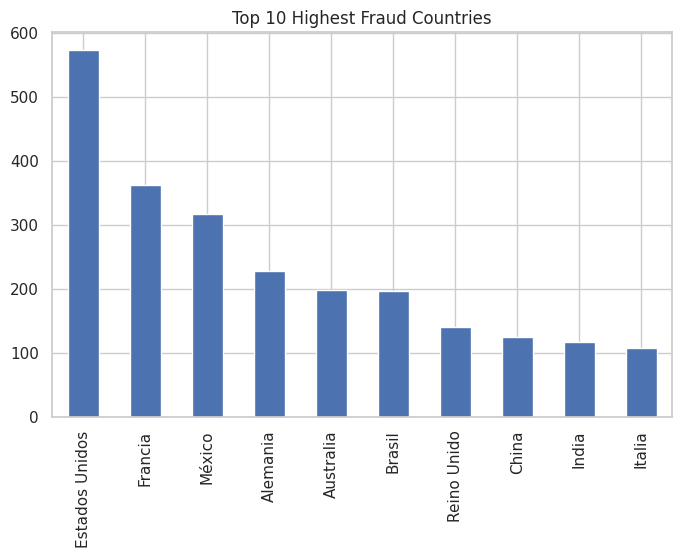

In [ ]:
fraud_data['Order Country'].value_counts().nlargest(10).plot.bar(figsize=(8,5), title="Top 10 Highest Fraud Countries")

In [ ]:
amount = data[(data['Order Country'] == 'Estados Unidos')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
amount['Sales'].sum()

112471.93234206

### Fraud Related Orders

- As observed from the above data EDA on Shipping mode, where the 'Same Day' shipping mode, ideally belongs to premium customers, subscribed customers, customers who have paid extra for the premium service, but as per numbers, we can see the shippiment is delayed for almost 50% of the orders, which is of high concern.

actions -
1. inventory management - demand forecasting to predict future demands to manage inventory better
2. store expansion such that the shipment from near by store is easier and faster
3. centralized warehouses

### Sales Analysis

In [ ]:
# Product Category Analysis

<ipython-input-107-b2c44b3f4d7b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(result.index, rotation=90, ha='right')


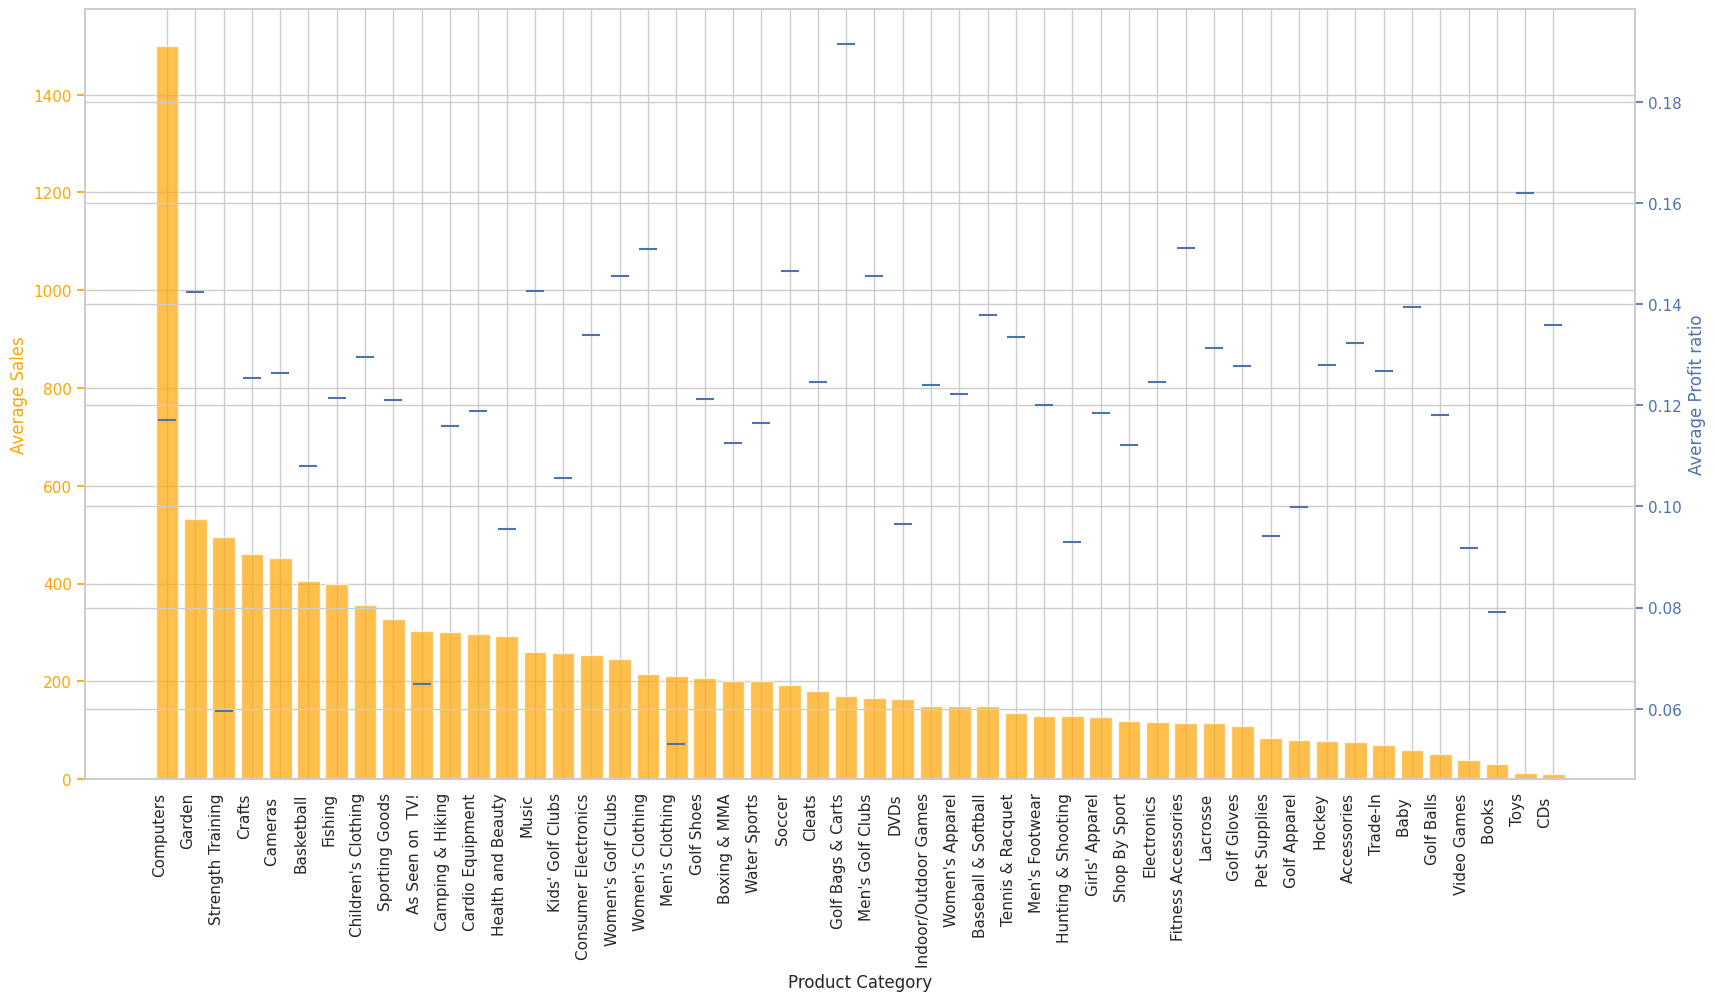

In [ ]:
df = data.copy()
result = df.groupby('Category Name')[['Sales', 'Order Profit Per Order', 'Order Item Profit Ratio']].mean()
result = result.sort_values(by='Sales', ascending=False)
fig, ax1 = plt.subplots(figsize=(20,10))

# Plot Sales on the first y-axis
ax1.bar(result.index, result['Sales'], color='orange', alpha=0.7, label='Sales')
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Average Sales', color='orange')
ax1.tick_params('y', colors='orange')
ax1.set_xticklabels(result.index, rotation=90, ha='right')
# Create the second y-axis
ax2 = ax1.twinx()

# Plot Order Profit Per Order on the second y-axis
ax2.scatter(result.index, result['Order Item Profit Ratio'], marker = '_',s = 150,color='b', label='Order Item Profit Ratio')
ax2.set_ylabel('Average Profit ratio', color='b')
ax2.tick_params('y', colors='b')
plt.show()

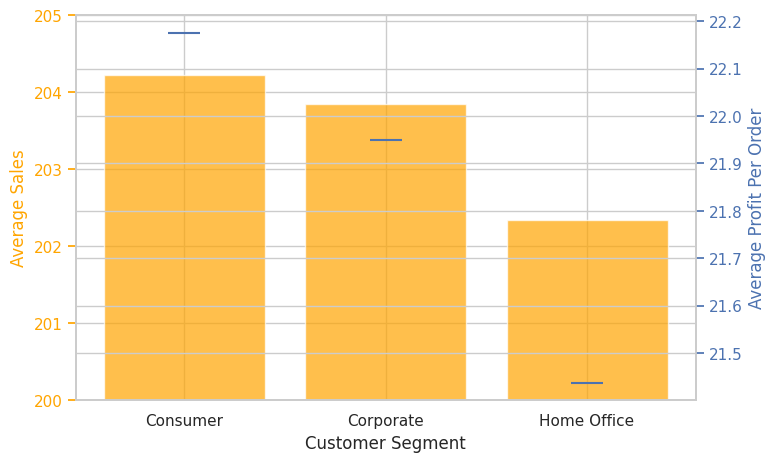

In [ ]:
# Customer Segment Analysis

result = df.groupby('Customer Segment')[['Sales', 'Order Profit Per Order', 'Order Item Profit Ratio']].mean()

fig, ax1 = plt.subplots(figsize=(8,5))

# Plot Sales on the first y-axis
ax1.bar(result.index, result['Sales'], color='orange', alpha=0.7, label='Sales')
ax1.set_xlabel('Customer Segment')
ax1.set_ylabel('Average Sales', color='orange')
ax1.tick_params('y', colors='orange')
ax1.set_yticks(range(200, int(result['Sales'].max()) + 2, 1))
ax1.set_ylim(200, int(result['Sales'].max())+1)

ax2 = ax1.twinx()
# Plot Order Profit Per Order on the second y-axis
ax2.scatter(result.index, result['Order Profit Per Order'], marker='_',color='b',s=500, label='Order Profit Per Order')
ax2.set_ylabel('Average Profit Per Order', color='b')
ax2.tick_params('y', colors='b')

In [ ]:
total_sales = df['Sales'].sum()
total_profit = df['Order Profit Per Order'].sum()
# pd.set_option('display.float_format', '${:,.2f}'.format)
total_sales,total_profit

(36784735.01337984, 3966902.9740503575)

Text(0.5, 1.0, 'Top 10 Countries by highest sales')

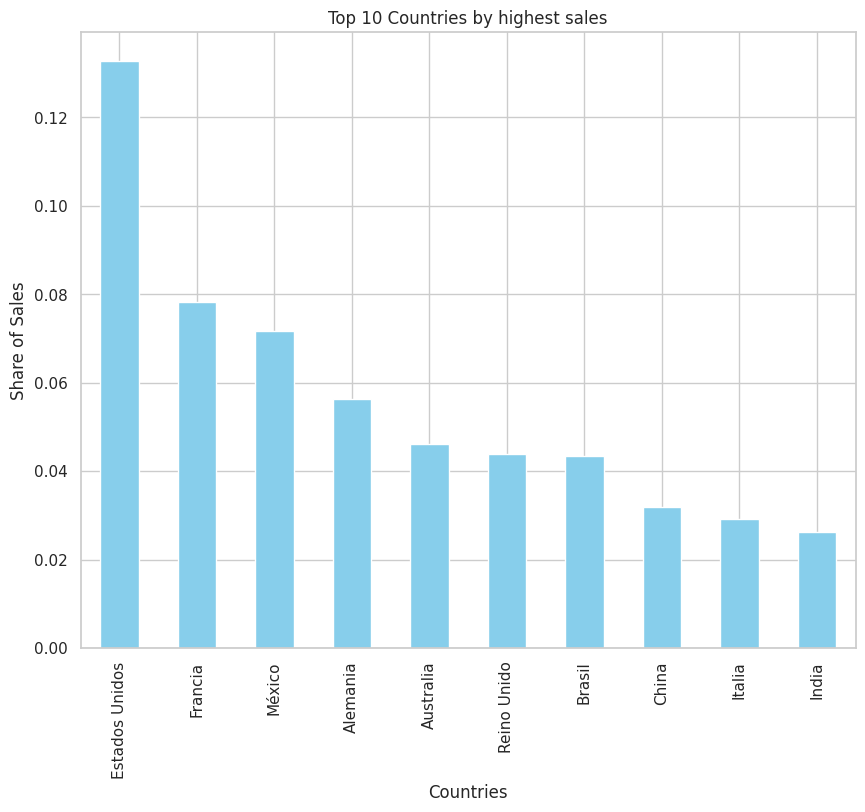

In [ ]:
sum_sales_country = df.groupby('Order Country')[['Sales','Order Profit Per Order']].sum().sort_values('Sales',ascending=False)
pd.set_option('display.float_format', '${:,.2f}'.format)
sum_sales_country.rename(columns={'Order Profit Per Order': 'Profit'}, inplace=True)
sum_sales_country.head(8)

sum_sales_country["% Sales"] = (sum_sales_country['Sales']/total_sales)
plt.figure(figsize=(10,8))
sum_sales_country['% Sales'].head(10).plot(kind='bar', color='skyblue')

plt.xlabel('Countries')
plt.ylabel('Share of Sales')
plt.title('Top 10 Countries by highest sales')

In [ ]:
sum_sales_country.head(10)

,Sales,Profit,% Sales
Order Country,,,
Estados Unidos,"$4,879,667.67","$540,413.07",$0.13
Francia,"$2,879,942.36","$327,828.58",$0.08
México,"$2,633,195.29","$303,278.37",$0.07
Alemania,"$2,074,171.82","$194,827.08",$0.06
Australia,"$1,694,621.67","$170,041.58",$0.05
Reino Unido,"$1,612,094.85","$180,942.88",$0.04
Brasil,"$1,594,319.95","$186,713.64",$0.04
China,"$1,172,902.11","$122,190.92",$0.03
Italia,"$1,072,181.67","$121,545.47",$0.03


In [ ]:
sum_sales_market = df.groupby('Market')[['Sales','Order Profit Per Order']].sum().sort_values('Sales',ascending=False)
pd.set_option('display.float_format', '${:,.2f}'.format)
sum_sales_market['Sales']

Market
Europe         $10,872,396.80
LATAM          $10,277,612.84
Pacific Asia    $8,273,743.74
USCA            $5,066,528.71
Africa          $2,294,452.93
Name: Sales, dtype: float64

### Expansion
- Must focus on expanding business across other countries. Most of the stores are located in USA, while the biggest market is Europe.
- Target one or two countries for expansion of networks across the world. Open stores, upfront investment would be higher but logistics cost will be decreased the shipping time will also be reduced. Will also result in higher customer base. increase in sales

### Loss Analysis

<ipython-input-113-77c28385a7c1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category Name', data=rows_with_loss_2000, palette='viridis')


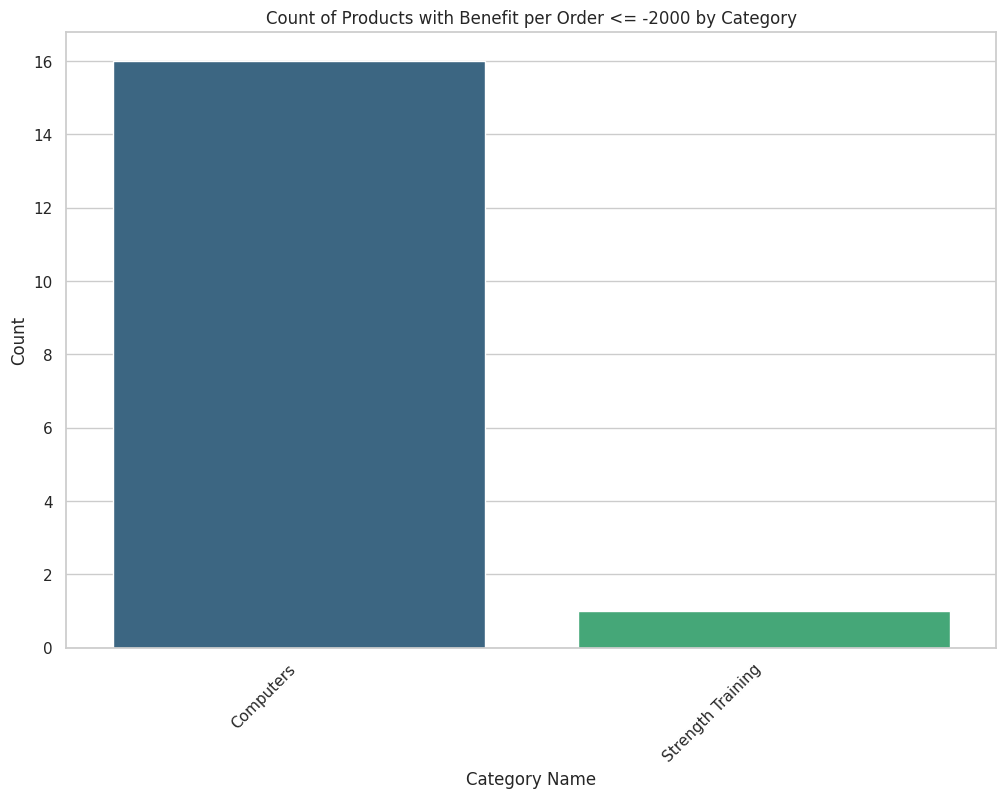

In [ ]:
# Create a boolean condition
loss_2000 = df["Benefit per order"] <= -2000

# Select rows based on the condition
rows_with_loss_2000 = df[loss_2000]

# Count the number of products giving a loss of -2000 or less in each category
loss_count_by_category = rows_with_loss_2000['Category Name'].value_counts()

# Plot a count plot for each category
plt.figure(figsize=(12, 8))
sns.countplot(x='Category Name', data=rows_with_loss_2000, palette='viridis')
plt.title('Count of Products with Benefit per Order <= -2000 by Category')
plt.xlabel('Category Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Insights / Inferences

1. Orders with loss > 2000, have occurred within 15 days in the month of November in 2017.
On research -> it is observed that, during the above mentioned time phase, Puerto Rico was hit by Hurricane named **'Maria'**, due to which computer category products were affected the most and thus encured high loss.


2. The accumulated sales losses amount to a substantial **$3.9 million**, indicating a significant impact. Notably, Cleats and Men's Footwear stand out as the categories with the highest sales losses. Central America and Western Europe emerge as the regions experiencing the most substantial sales losses. These losses could be attributed to instances of suspected fraud or delays in delivery.

3. It is crucial to investigate the payment methods associated with fraudulent activities to implement preventive measures for the future and enhance fraud detection mechanisms. Understanding the patterns in payment methods related to fraud can contribute to a more robust and secure transaction process.

4. We can infer that all the suspected frauds are taking place only is Transfer type and western Europe, Central America and South America have the Highest Number of fraud

5. The most number of orders came in October followed by November, and orders for all other months are consistent. Highest number of orders are placed by customers in 2017. Saturday recorded highest number of average sales and wednesday with the least number of sales.

6. The analysis of delivery statuses indicates that the majority of orders in the dataset experience delays, as evidenced by the high count of "Late delivery" instances. This suggests potential challenges or inefficiencies in the delivery process that may need attention. Investigating the reasons behind these delays and implementing measures to address them could significantly improve the overall customer experience.

7. Additionally, the prevalence of "Advance shipping" implies a proactive approach to order fulfillment, with a substantial number of orders being shipped ahead of schedule. Understanding the circumstances and impact of advance shipping can help optimize inventory management and resource allocation.

8. While there is a considerable count of orders marked as "Shipping on time," it would be beneficial to further analyze factors contributing to timely deliveries. Identifying the key drivers of on-time shipments can be leveraged to enhance operational processes and maintain customer satisfaction.

9. The presence of "Shipping canceled" orders is noteworthy, and exploring the reasons behind cancellations could unveil insights into areas for improvement. Analyzing patterns associated with canceled shipments may guide decision-making.

10.
- For all suspected fraud order status, the shipping was cancelled
- Highest suspected orders were for Estados Unidos followed by Francia (order country)
- Highest suspected orders were from EE. UU. customer country

- It is crucial to investigate the payment methods associated with fraudulent activities to implement preventive measures for the future and enhance fraud detection mechanisms. Understanding the patterns in payment methods related to fraud can contribute to a more robust and secure transaction process.

11.
- Shipping, priority considered as -> Same Day > First Class > Second Class > Standard Class
- Second Class has the worst shipping services, as it extends upto 4,5,6 days, which is even worse than standard class
- For orders with **scheduled** days of shipment = 4, it is observed that the orders are 'shipped in advance', others are usually 'late' or 'on time' etc.
- For orders with **scheduled** days of shipment = 2, it is observed that the shipment can be delayed by 4 days i.e. 2 days can go upto 6 days
- For orders with **scheduled** days of shipment = 1, it is observed that the shipment is always late by 1 day i.e. it is shipped 1 day late always

### Rough

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Extract relevant columns
product_columns = ['Order Id', 'Product Name']

# Create a new DataFrame with only the relevant columns
product_df = data[product_columns]

# Display the product DataFrame
product_df


,Order Id,Product Name
0,77202,Smart watch
1,75939,Smart watch
2,75938,Smart watch
3,75937,Smart watch
4,75936,Smart watch
...,...,...
180514,26043,Field & Stream Sportsman 16 Gun Fire Safe
180515,26037,Field & Stream Sportsman 16 Gun Fire Safe
180516,26024,Field & Stream Sportsman 16 Gun Fire Safe
180517,26022,Field & Stream Sportsman 16 Gun Fire Safe


In [ ]:
# Find the correlation between unique products and how often they are sold together
product_combinations = product_df.groupby('Order Id')['Product Name'].apply(list)
correlation_matrix = product_combinations.apply(lambda x: pd.Series(x).value_counts()).fillna(0).corr()

# Display the correlation matrix
correlation_matrix

,Diamondback Women's Serene Classic Comfort Bi,Pelican Sunstream 100 Kayak,Nike Men's CJ Elite 2 TD Football Cleat,Nike Men's Dri-FIT Victory Golf Polo,Team Golf New England Patriots Putter Grip,Perfect Fitness Perfect Rip Deck,O'Brien Men's Neoprene Life Vest,Glove It Imperial Golf Towel,Nike Men's Free 5.0+ Running Shoe,Glove It Women's Mod Oval 3-Zip Carry All Gol,Under Armour Girls' Toddler Spine Surge Runni,Nike Women's Legend V-Neck T-Shirt,Under Armour Women's Ignite Slide,Field & Stream Sportsman 16 Gun Fire Safe,Bridgestone e6 Straight Distance NFL San Dieg,Under Armour Men's Tech II T-Shirt,Glove It Women's Mod Oval Golf Glove,adidas Kids' F5 Messi FG Soccer Cleat,Team Golf Tennessee Volunteers Putter Grip,Bridgestone e6 Straight Distance NFL Tennesse,Glove It Urban Brick Golf Towel,Team Golf San Francisco Giants Putter Grip,Titleist Pro V1 High Numbers Personalized Gol,Clicgear 8.0 Shoe Brush,Bridgestone e6 Straight Distance NFL Carolina,TYR Boys' Team Digi Jammer,Bag Boy Beverage Holder,adidas Youth Germany Black/Red Away Match Soc,Under Armour Men's Compression EV SL Slide,Columbia Men's PFG Anchor Tough T-Shirt,Nike Dri-FIT Crew Sock 6 Pack,Glove It Women's Imperial Golf Glove,Nike Men's Deutschland Weltmeister Winners Bl,Hirzl Men's Hybrid Golf Glove,Hirzl Women's Soffft Flex Golf Glove,Under Armour Hustle Storm Medium Duffle Bag,Team Golf Texas Longhorns Putter Grip,Clicgear Rovic Cooler Bag,Nike Women's Tempo Shorts,Titleist Pro V1x High Numbers Golf Balls,ENO Atlas Hammock Straps,Titleist Pro V1x High Numbers Personalized Go,Titleist Pro V1x Golf Balls,Nike Men's Comfort 2 Slide,Under Armour Women's Ignite PIP VI Slide,adidas Men's Germany Black Crest Away Tee,Under Armour Kids' Mercenary Slide,LIJA Women's Eyelet Sleeveless Golf Polo,Top Flite Women's 2014 XL Hybrid,Team Golf Pittsburgh Steelers Putter Grip,adidas Men's F10 Messi TRX FG Soccer Cleat,Under Armour Women's Micro G Skulpt Running S,Hirzl Women's Hybrid Golf Glove,Team Golf St. Louis Cardinals Putter Grip,Merrell Men's All Out Flash Trail Running Sho,LIJA Women's Button Golf Dress,GolfBuddy VT3 GPS Watch,Elevation Training Mask 2.0,Nike Men's Kobe IX Elite Low Basketball Shoe,The North Face Women's Recon Backpack,MDGolf Pittsburgh Penguins Putter,Cleveland Golf Women's 588 RTX CB Satin Chrom,insta-bed Neverflat Air Mattress,Merrell Women's Grassbow Sport Waterproof Hik,LIJA Women's Mid-Length Panel Golf Shorts,Polar FT4 Heart Rate Monitor,Merrell Women's Grassbow Sport Hiking Shoe,TaylorMade Women's RBZ SL Rescue,Merrell Women's Siren Mid Waterproof Hiking B,LIJA Women's Argyle Golf Polo,Ogio Race Golf Shoes,Nike Men's Fingertrap Max Training Shoe,adidas Brazuca 2014 Official Match Ball,Yakima DoubleDown Ace Hitch Mount 4-Bike Rack,Garmin Approach S3 Golf GPS Watch,Nike Women's Free 5.0 TR FIT PRT 4 Training S,Cleveland Golf Collegiate My Custom Wedge 588,Fitbit The One Wireless Activity & Sleep Trac,Mio ALPHA Heart Rate Monitor/Sport Watch,Brooks Women's Ghost 6 Running Shoe,TaylorMade 2014 Purelite Stand Bag,Polar Loop Activity Tracker,Nike Kids' Grade School KD VI Basketball Shoe,Titleist Small Wheeled Travel Cover,Bag Boy M330 Push Cart,TaylorMade White Smoke IN-12 Putter,Nike Men's Free TR 5.0 TB Training Shoe,GoPro HERO3+ Black Edition Camera,Total Gym 1400,Pelican Maverick 100X Kayak,Diamondback Boys' Insight 24 Performance Hybr,Stiga Master Series ST3100 Competition Indoor,Garmin Forerunner 910XT GPS Watch,Garmin Approach S4 Golf GPS Watch,Diamondback Girls' Clarity 24 Hybrid Bike 201,Titleist Club Glove Travel Cover,Bowflex SelectTech 1090 Dumbbells,SOLE E35 Elliptical,SOLE E25 Elliptical,Bushnell Pro X7 Jolt Slope Rangefinder,Sports Books,Baby sweater,CDs of rock,Web Camera,Children's heaters,Dell Laptop,Industrial consumer electronics,Porcelain crafts,DVDs,Lawn mower,First aid kit,Men's gala suit,Rock music,Adult dog supplies,Smart watch,Toys,Fighting video games,Summer dresses
Diamondback Women's Serene Classic Comfort Bi,$1.00,$0.01,

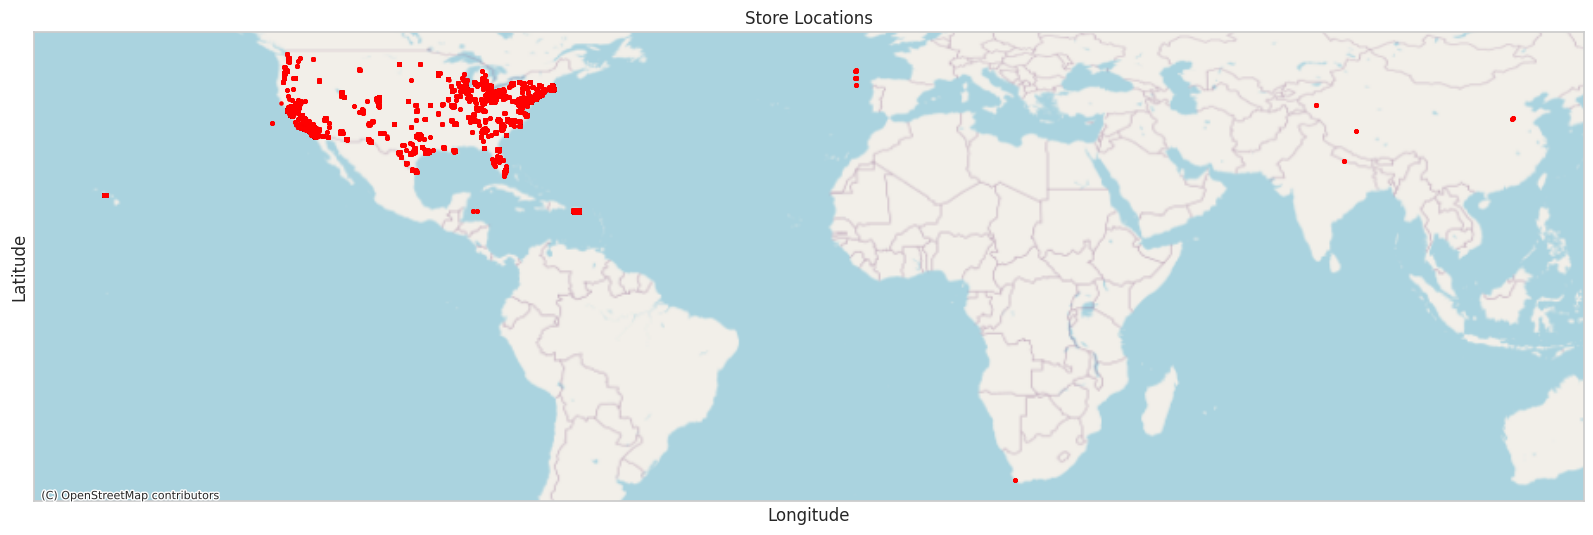

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

if gdf.crs is None:
    gdf.crs = 'EPSG:4326'


fig, ax = plt.subplots()


gdf.plot(ax=ax, color='red', markersize=5)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Store Locations')


ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_xticks([])
ax.set_yticks([])

plt.show()
